# Introduction to LLMs in Healthcare

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MoLue/wft_digital_medicine/blob/main/llms_in_healthcare.ipynb)

*Author: Timo Lüders*

*Last Updated: May 2025*

## Table of Contents

1. [Introduction]
2. [Understanding LLMs in Healthcare Context]
3. [Accessing and Using Open Source Medical LLMs]
4. [Medical Prompt Engineering]
5. [Implementing Simple Medical RAG in Colab]
6. [Working with Pre-trained Medical LLMs]
7. [Practical Applications]
8. [Evaluating LLM Outputs]

## 1. Introduction

### Welcome to the Introduction to LLMs in Healthcare notebook!

This notebook is designed for medical students, healthcare professionals, and researchers who want to understand how Large Language Models (LLMs) can be applied in healthcare settings. Whether you're new to artificial intelligence or have some experience with machine learning, this notebook will provide you with practical insights into using LLMs for medical applications.

### Purpose of This Notebook

The goal of this notebook is to:
- Introduce you to Large Language Models and their relevance to healthcare
- Provide hands-on experience with open-source medical LLMs
- Teach practical skills for prompt engineering in medical contexts
- Show how to implement retrieval-augmented generation for improved medical accuracy
- Demonstrate practical healthcare applications of LLMs
- Explore ethical considerations specific to medical AI

### Prerequisites

To get the most out of this notebook, you should have:
- Basic familiarity with Python programming
- Completion of the Data Science Onboarding notebook (recommended but not required)
- Interest in healthcare applications of AI

### How to Use This Notebook

This notebook is designed to be interactive. You'll find a mix of explanatory text, code cells, and exercises. To navigate through the notebook:
- Read through the explanatory text to understand concepts
- Run code cells by clicking the play button or pressing Shift+Enter
- Complete exercises to practice what you've learned
- Use the Table of Contents to jump to specific sections

Let's begin by setting up our environment with the necessary packages!

### Environment Setup

First, let's install the packages we'll need for this notebook. We'll be using several libraries that allow us to work with language models efficiently within Google Colab's resource constraints.

In [1]:
# Upgrade pip first
!pip install --upgrade pip

# Install required packages
!pip install -q transformers datasets sentence-transformers faiss-cpu torch einops accelerate bitsandbytes

# For RAG implementation
!pip install -q langchain chromadb

# For evaluation
!pip install -q evaluate rouge-score nltk


# Install sacremoses (required for some tokenizers)
!pip install -q sacremoses

# For RAG implementation
!pip install -q langchain chromadb

# For evaluation
!pip install -q evaluate rouge-score nltk

# For UI elements and system monitoring
!pip install -q ipywidgets psutil


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 M

In [2]:
# Check if we're running in Colab
import sys

IN_COLAB = 'google.colab' in sys.modules
print(f"Running in Google Colab: {IN_COLAB}")

if IN_COLAB:
    # Check available GPU
    !nvidia-smi -L

    # Check available memory
    !free -h

    print("\nNote: This notebook is optimized to run with Colab's free resources.")
    print("Some models may run slowly or require memory optimization techniques.")

Running in Google Colab: True
GPU 0: Tesla T4 (UUID: GPU-70698f7d-46b0-3a29-b872-b4d608bd6fdb)
               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.2Gi       1.2Gi       3.0Mi        10Gi        11Gi
Swap:             0B          0B          0B

Note: This notebook is optimized to run with Colab's free resources.
Some models may run slowly or require memory optimization techniques.


## 2. Understanding LLMs in Healthcare Context

### What are Large Language Models?

Large Language Models (LLMs) are a type of artificial intelligence system trained on vast amounts of text data to understand and generate human-like language. These models use complex neural network architectures (typically transformer-based) to process and generate text.

At a high level, LLMs work by:
1. **Learning patterns in language** from massive datasets
2. **Predicting the next word or token** in a sequence based on context
3. **Generating coherent text** by repeatedly predicting the next most likely token

### Recent Developments in Medical LLMs

The field of medical LLMs has seen significant advancements in recent years:

1. **Domain-specific pre-training**: Models like BioGPT, BioMedLM, and MedAlpaca have been pre-trained on medical literature, clinical notes, and healthcare datasets to better understand medical terminology and concepts.

2. **Specialized capabilities**: Recent medical LLMs can assist with tasks such as medical question answering, clinical documentation, literature review, and patient education.

3. **Open-source medical models**: Several open-source initiatives have made smaller but effective medical LLMs available to researchers and developers.

4. **Parameter-efficient approaches**: Techniques like LoRA (Low-Rank Adaptation) allow efficient fine-tuning of models for medical tasks without requiring massive computational resources.

### Current Applications in Healthcare Settings

LLMs are being applied in healthcare in numerous ways:

1. **Clinical documentation assistance**: Helping clinicians draft notes, summarize patient encounters, and code medical procedures.

2. **Medical question answering**: Providing evidence-based answers to clinical questions at the point of care.

3. **Patient education**: Generating tailored educational materials that explain medical conditions in patient-friendly language.

4. **Literature review assistance**: Summarizing and extracting key information from medical research papers.

5. **Medical education**: Creating case studies, practice questions, and learning materials for healthcare students.

6. **Clinical decision support**: Assisting (but not replacing) clinician judgment by providing relevant information and considerations.

### Example: Medical LLM Use Cases

Here are some specific examples of how LLMs are being used in medicine:

- **Primary care**: Drafting patient instructions, summarizing visit notes, suggesting potential diagnoses based on symptoms
- **Radiology**: Structuring findings from imaging reports, generating preliminary report drafts
- **Pathology**: Extracting key information from pathology reports, standardizing reporting formats
- **Research**: Literature review, hypothesis generation, study design assistance
- **Medical education**: Creating case scenarios, generating practice exam questions

In the following sections, we'll explore how to access and use these models, with a focus on open-source options that can run within Colab's resource constraints.

## 3. Accessing and Using Open Source Medical LLMs

### Introduction to Open Source Medical LLMs

While commercial LLMs are powerful, there are excellent open-source alternatives specifically designed for biomedical applications. Smaller open-source models can run directly in Colab and locally, offering several advantages:

- **No API costs**: Free to use and experiment with
- **Transparency**: Open model architecture and training data
- **Customizability**: Can be adapted for specific medical tasks
- **Privacy**: Data remains local rather than being sent to external APIs

Let's explore some of these models and how to use them effectively within resource constraints.

### Loading Smaller Biomedical Models

For both local environments and Colab's free tier, we need to be mindful of memory limitations. Here are some strategies for working with LLMs in this environment:

1. **Choose smaller models**: 7B parameter models or smaller work well in resource-constrained environments
2. **Use quantization**: 4-bit or 8-bit quantization reduces memory requirements
3. **Optimize inference**: Techniques like attention caching can improve performance
4. **Load models efficiently**: Only load what you need

In [3]:
import torch
import psutil

# Check available CPU memory
print(f"Available system memory: {psutil.virtual_memory().available / 1e9:.2f} GB")

Available system memory: 11.85 GB


### Loading a Biomedical Language Model

Let's start by loading a smaller biomedical language model using the Transformers library. We'll use Microsoft's BioGPT, which is a biomedical-focused language model that's well-supported in the Hugging Face ecosystem.

In [5]:
from transformers import BioGptTokenizer, BioGptForCausalLM

# Load tokenizer
tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")

# Check environment
has_gpu = torch.cuda.is_available()

# Configure device and quantization based on environment
device_map = "auto" if has_gpu else None
load_in_8bit = has_gpu  # Only use 8-bit quantization with GPU

# Load model with appropriate settings for the environment
model = BioGptForCausalLM.from_pretrained(
    "microsoft/biogpt",
    device_map=device_map,
    load_in_8bit=load_in_8bit if has_gpu else False,
    # If no GPU, use CPU but with lower precision to save memory
    torch_dtype=torch.float16 if has_gpu else torch.float32
)

print(f"Model 'microsoft/biogpt' loaded successfully!")
print(f"Model is running on: {'GPU' if has_gpu else 'CPU'}")

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

Model 'microsoft/biogpt' loaded successfully!
Model is running on: GPU


In [9]:
def generate_text(prompt, max_new_tokens=100):
    """Generate text from a prompt using our loaded model."""
    # Tokenize the input
    inputs = tokenizer(prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Generate with minimal parameters
    with torch.no_grad():
        # Get the input IDs
        input_ids = inputs["input_ids"]

        # Pass input_ids directly to model.generate
        outputs = model.generate(
            input_ids,
            max_new_tokens=max_new_tokens,  # Generate this many new tokens
            do_sample=True,
            temperature=0.8,  # Slightly higher temperature for more creativity
            top_p=0.92,
            pad_token_id=tokenizer.eos_token_id
        )

    # Get the full output and print it for debugging
    full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # For BioGPT, sometimes we need to manually extract the response
    # Try different approaches to extract the generated text
    if prompt + " " in full_output:  # Check if prompt is followed by a space
        return full_output.split(prompt + " ", 1)[1]
    elif prompt in full_output:
        return full_output.split(prompt, 1)[1]
    else:
        return full_output

### Basic Interaction with Biomedical Models

Now that we have our model loaded, let's try some basic interactions. We'll start with a simple medical question:

In [10]:
# Try a simple medical question
medical_prompt = "The symptoms of myocardial infarction include:"
response = generate_text(medical_prompt)
print("Prompt:", medical_prompt)
print("\nResponse:")
print(response)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: The symptoms of myocardial infarction include:

Response:
chest pain, dyspnea, and palpitations.


### Basic Interaction with Biomedical Models

Now that we have our model loaded, let's try some basic interactions. We'll start with a simple medical question.

Do you notice any difference to the code cell before?

In [11]:
def generate_text(prompt, max_length=200):
    """Generate text from a prompt using our loaded model."""
    inputs = tokenizer(prompt, return_tensors="pt")

    # Move inputs to the same device as the model
    if has_gpu:
        inputs = inputs.to(model.device)

    # Generate with basic parameters
    outputs = model.generate(
        inputs.input_ids,
        max_length=max_length,
        temperature=0.7,  # Controls randomness (lower = more deterministic)
        top_p=0.9,
        do_sample=True,  # Use sampling instead of greedy decoding
        pad_token_id=tokenizer.eos_token_id  # Prevent padding warnings
    )

    # Decode and return the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Try a simple medical question
medical_prompt = "What are the common symptoms of type 2 diabetes?"
response = generate_text(medical_prompt)
print("Prompt:", medical_prompt)
print("\nResponse:")
print(response)

Prompt: What are the common symptoms of type 2 diabetes?

Response:
What are the common symptoms of type 2 diabetes?


### Alternative Model Options for Colab

Here are some other biomedical models that work well in Colab's free tier (but require a authentication via Hugging Face token):

1. **BioGPT (Microsoft)**: A 1.5B parameter model trained on biomedical literature
2. **MedAlpaca-7B**: A 7B parameter model fine-tuned for medical knowledge
3. **SciFive**: A T5-based model for biomedical text
4. **BioLinkBERT**: Optimized for biomedical entity relationships

Here are several biomedical language models that are freely accessible without needing to log in to Hugging Face:

- BioBERT models from DMIS Lab:
  - dmis-lab/biobert-v1.1
  - dmis-lab/biobert-base-cased-v1.1
  - dmis-lab/biobert-base-cased-v1.2
- Microsoft BioGPT (which you already have working in your notebook):
  - microsoft/biogpt
- PubMedBERT models:
  - microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext
  - microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract
- BioMedLM:
  - stanford-crfm/BioMedLM
- SciFive models:
  - razent/SciFive-base-Pubmed_PMC
  - razent/SciFive-large-Pubmed_PMC
- Clinical models:
  - emilyalsentzer/Bio_ClinicalBERT
  - EmilyAlsentzer/clinicalBERT
- BlueBERT models:
  - bionlp/bluebert_pubmed_mimic_uncased_L-12_H-768_A-12
bionlp/bluebert_pubmed_uncased_L-12_H-768_A-12

Let's try loading and using biobert:

In [12]:
import gc
from transformers import AutoTokenizer, AutoModel

# Load BioBERT model and tokenizer
biobert_tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-base-cased-v1.2")
biobert_model = AutoModel.from_pretrained("dmis-lab/biobert-base-cased-v1.2")

# Move model to GPU if available
if has_gpu:
    biobert_model = biobert_model.to("cuda")

print("BioBERT model loaded successfully!")

# Function to get embeddings from BioBERT
def get_biobert_embedding(text):
    inputs = biobert_tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move inputs to the same device as the model
    if has_gpu:
        inputs = {k: v.to(biobert_model.device) for k, v in inputs.items()}

    # Get model output
    with torch.no_grad():
        outputs = biobert_model(**inputs)

    # Use the [CLS] token embedding as the sentence embedding
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

# Example: Compare similarity between medical terms
def compare_medical_terms(term1, term2):
    # Get embeddings
    emb1 = get_biobert_embedding(term1)
    emb2 = get_biobert_embedding(term2)

    # Calculate cosine similarity
    similarity = torch.nn.functional.cosine_similarity(emb1, emb2).item()
    return similarity

# Compare some medical terms
term_pairs = [
    ("diabetes mellitus", "high blood sugar"),
    ("myocardial infarction", "heart attack"),
    ("hypertension", "elevated blood pressure"),
    ("diabetes mellitus", "myocardial infarction")  # Less related terms
]

print("\nMedical Term Similarity (BioBERT):")
for term1, term2 in term_pairs:
    similarity = compare_medical_terms(term1, term2)
    print(f"Similarity between '{term1}' and '{term2}': {similarity:.4f}")

config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

BioBERT model loaded successfully!

Medical Term Similarity (BioBERT):
Similarity between 'diabetes mellitus' and 'high blood sugar': 0.8749
Similarity between 'myocardial infarction' and 'heart attack': 0.9044
Similarity between 'hypertension' and 'elevated blood pressure': 0.8957
Similarity between 'diabetes mellitus' and 'myocardial infarction': 0.9050


You can clear any model from memory by running the following code:



In [13]:
# Clear memory from previous model
del model
gc.collect()
if has_gpu:
    torch.cuda.empty_cache()

### Efficient Inference Techniques for Resource-Constrained Environments

When working with LLMs in resource-constrained environments, several techniques can help optimize performance:

1. **Batch processing**: Process multiple inputs at once
2. **Model pruning**: Using smaller, more efficient models
3. **Quantization**: Reducing precision to save memory
4. **Caching**: Reusing computations when possible
5. **Gradient checkpointing**: Trading computation for memory

Let's implement a more memory-efficient approach using PubMedBERT:

In [14]:
# Clear memory from previous models
if biobert_model is not None:
    del biobert_model
    gc.collect()
if has_gpu:
    torch.cuda.empty_cache()

from transformers import AutoTokenizer, AutoModelForMaskedLM

# Load PubMedBERT with memory optimizations
pubmed_tokenizer = AutoTokenizer.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext")

# Configure model loading based on available resources
model_config = {
    "pretrained_model_name_or_path": "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext",
}

# Add GPU-specific optimizations if available
if has_gpu:
    model_config.update({
        "device_map": "auto",
        "torch_dtype": torch.float16,
    })

pubmed_model = AutoModelForMaskedLM.from_pretrained(**model_config)

print("PubMedBERT model loaded successfully!")

# Function for memory-efficient masked word prediction
def predict_masked_word(text, mask_position=None):
    """
    Predict a masked word in a sentence.
    If mask_position is None, the [MASK] token in the text will be used.
    Otherwise, the word at the specified position will be masked.
    """
    if mask_position is not None:
        # Split text into words
        words = text.split()
        if 0 <= mask_position < len(words):
            # Replace the word at mask_position with [MASK]
            masked_word = words[mask_position]
            words[mask_position] = pubmed_tokenizer.mask_token
            masked_text = " ".join(words)
        else:
            raise ValueError(f"Mask position {mask_position} out of range (0-{len(words)-1})")
    else:
        # Use the provided text with [MASK] token
        if pubmed_tokenizer.mask_token not in text:
            raise ValueError(f"No {pubmed_tokenizer.mask_token} token found in the text")
        masked_text = text
        masked_word = None

    # Tokenize
    inputs = pubmed_tokenizer(masked_text, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(pubmed_model.device) for k, v in inputs.items()}

    # Find position of mask token
    mask_token_index = torch.where(inputs["input_ids"] == pubmed_tokenizer.mask_token_id)[1]

    # Get predictions
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = pubmed_model(**inputs)

    # Get predicted token
    logits = outputs.logits
    mask_token_logits = logits[0, mask_token_index, :]

    # Get top 5 predictions
    top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()
    top_5_words = [pubmed_tokenizer.decode([token]) for token in top_5_tokens]

    return {
        "masked_text": masked_text,
        "original_word": masked_word,
        "top_predictions": top_5_words
    }

# Test with medical sentences
medical_sentences = [
    "Patients with [MASK] often present with polyuria and polydipsia.",
    "The patient was diagnosed with [MASK] after an ECG showed ST elevation.",
    "Treatment with [MASK] is first-line therapy for uncomplicated hypertension."
]

print("\nMedical Term Prediction (PubMedBERT):")
for sentence in medical_sentences:
    results = predict_masked_word(sentence)
    print(f"\nSentence: {results['masked_text']}")
    print(f"Top predictions: {', '.join(results['top_predictions'])}")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


PubMedBERT model loaded successfully!

Medical Term Prediction (PubMedBERT):

Sentence: Patients with [MASK] often present with polyuria and polydipsia.
Top predictions: diabetes, pd, ms, pkd, hus

Sentence: The patient was diagnosed with [MASK] after an ECG showed ST elevation.
Top predictions: ami, stemi, af, hcm, myocarditis

Sentence: Treatment with [MASK] is first-line therapy for uncomplicated hypertension.
Top predictions: diuretics, losartan, arb, nifedipine, monotherapy


### Efficient Inference Techniques for Resource-Constrained Environments

When working with LLMs in Colab's limited resources, several techniques can help optimize performance:

1. **Gradient checkpointing**: Trades computation for memory by recomputing activations during the backward pass
2. **Attention caching**: Caches key-value pairs to avoid redundant computations
3. **Flash Attention**: More efficient attention implementation
4. **Model pruning**: Removing less important weights
5. **Low-rank adaptation**: Efficient fine-tuning that requires less memory

Let's implement some of these techniques:

In [17]:
# Load model with memory optimizations
from transformers import AutoModelForCausalLM, AutoTokenizer

# First load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("stanford-crfm/BioMedLM")

# Load a smaller model with optimizations - without the unsupported parameter
model = AutoModelForCausalLM.from_pretrained(
    "stanford-crfm/BioMedLM",
    device_map="auto",
    load_in_8bit=True,
    torch_dtype=torch.float16,
    use_cache=False  # Disable KV cache during training
)

# Enable gradient checkpointing after model is loaded (if the model supports it)
try:
    model.gradient_checkpointing_enable()
    print("Gradient checkpointing enabled")
except AttributeError:
    print("This model doesn't support gradient checkpointing - continuing without it")

# Re-enable caching for inference
model.config.use_cache = True

# Function for memory-efficient generation
def memory_efficient_generate(prompt, max_new_tokens=100):
    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    # Generate with optimized settings
    with torch.no_grad():  # Disable gradient calculation
        outputs = model.generate(
            inputs.input_ids,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            top_p=0.9,
            # Use efficient attention patterns
            use_cache=True,  # Enable KV cache for inference
            # Process in smaller chunks if needed
            max_length=inputs.input_ids.shape[1] + max_new_tokens
        )

    # Decode and return
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:28895 for open-end generation.
Both `max_new_tokens` (=200) and `max_length`(=258) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Gradient checkpointing enabled
Response: 


Patient presents with polyuria, polydipsia, and unexplained weight loss over the past 3 months.
Lab results show fasting blood glucose of 180 mg/dL and HbA1c of 8.2%.
What is the likely diagnosis and what additional tests would you recommend?

                                                                                                                                                                                                       


In [22]:
# Test with a complex medical query
complex_query = """
Patient presents with polyuria, polydipsia, and unexplained weight loss over the past 3 months.
Lab results show fasting blood glucose of 180 mg/dL and HbA1c of 8.2%.
What is the likely diagnosis and what additional tests would you recommend?

"""

response = memory_efficient_generate(complex_query, max_new_tokens=300)

print("Response: \n")
print(response)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:28895 for open-end generation.
Both `max_new_tokens` (=300) and `max_length`(=359) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Response: 


Patient presents with polyuria, polydipsia, and unexplained weight loss over the past 3 months.
Lab results show fasting blood glucose of 180 mg/dL and HbA1c of 8.2%.
What is the likely diagnosis and what additional tests would you recommend?

                                                                                                                                                                                                                                                                                                            


### Practical Tips for Working with LLMs in Any Environment

Here are some additional tips for effectively working with LLMs:

1. **Monitor memory usage**: Keep an eye on system resources
2. **Start small**: Begin with smaller models and scale up as needed
3. **Use text-only outputs**: Avoid generating images or other media that consume memory
4. **Batch processing**: Process multiple inputs in batches rather than one at a time
5. **Save intermediate results**: Don't rely on keeping the model loaded for long periods

### Exercise: Exploring Model Capabilities

Try experimenting with different medical prompts to explore the capabilities and limitations of these biomedical LLMs. Here are some suggestions:

1. Ask about treatment options for a common condition
2. Request an explanation of a medical procedure
3. Ask for a differential diagnosis based on symptoms
4. Request a summary of recent research on a medical topic

Remember that these models, while trained on medical data, may still produce inaccurate information. Always verify any medical information with authoritative sources.

In [23]:
# Clear memory from all models
try:
    del pubmed_model
    gc.collect()
    if has_gpu:
        torch.cuda.empty_cache()
    print("Resources cleaned up successfully!")
except:
    print("No resources to clean up.")


Resources cleaned up successfully!


## 4. Medical Prompt Engineering

### Introduction to Medical Prompt Engineering

Prompt engineering is the art and science of designing effective prompts to get the best possible responses from language models. In medical contexts, this skill becomes even more critical as the accuracy, clarity, and safety of the information can have significant implications.

Medical prompt engineering requires understanding both the capabilities of LLMs and the nuances of medical communication. Let's explore how to craft effective prompts for medical applications.

### Principles of Effective Medical Prompts

When crafting prompts for medical LLMs, consider these key principles:

1. **Specificity**: Be precise about the medical context, condition, or scenario
2. **Clarity**: Use unambiguous medical terminology when appropriate
3. **Scope definition**: Clearly define the boundaries of the requested information
4. **Audience awareness**: Specify the intended audience (patient, medical student, clinician)
5. **Purpose declaration**: State the purpose of the information (education, decision support, etc.)
6. **Safety guardrails**: Include explicit instructions about limitations and disclaimers

Let's see how these principles translate into practice:

In [26]:
import torch
import gc

# Load BioGPT model and tokenizer for our examples
from transformers import BioGptTokenizer, BioGptForCausalLM

tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")
model = BioGptForCausalLM.from_pretrained(
    "microsoft/biogpt",
    device_map="auto" if has_gpu else None,
    torch_dtype=torch.float16 if has_gpu else torch.float32
)

def generate_response(prompt, max_length=300):
    """Generate a response from the model based on the prompt."""
    inputs = tokenizer(prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Generate response
    with torch.no_grad():
        outputs = model.generate(
            inputs["input_ids"],
            max_length=max_length,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode and return
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

### Examples of Good vs. Poor Medical Prompts

Let's compare some examples of effective and ineffective medical prompts. Play around with the prompts and parameters and see how the responses differ.

What do you observe? You can also compare it with the improved version in one of the next cells.

In [27]:
# Define pairs of poor and good prompts
prompt_pairs = [
    {
        "poor": "Tell me about diabetes. Your answer here:",
        "good": "Provide a concise overview of Type 2 Diabetes Mellitus, including its pathophysiology, common symptoms, diagnostic criteria, and first-line treatments. Target the information for a third-year medical student. Your answer here:"
    },
    {
        "poor": "What medication should I take for high blood pressure? Your answer here:",
        "good": "Explain the major classes of antihypertensive medications, their mechanisms of action, and common side effects. This information is for educational purposes only and not intended as medical advice. Your answer here:"
    },
    {
        "poor": "Is this rash dangerous? Your answer here:",
        "good": "Describe the differential diagnosis for common erythematous rashes in adults, including key distinguishing features and red flags that would warrant urgent medical attention. Format the response as a table comparing these conditions. Your answer here:"
    }
]

# Compare responses
for i, pair in enumerate(prompt_pairs, 1):
    print(f"\n--- Example {i} ---\n")

    print("Poor prompt:")
    print(pair["poor"])
    poor_response = generate_response(pair["poor"], max_length=600)
    print("\nResponse to poor prompt:")
    print(poor_response[:800] + "..." if len(poor_response) > 800 else poor_response)

    print("\nGood prompt:")
    print(pair["good"])
    good_response = generate_response(pair["good"], max_length=600)
    print("\nResponse to good prompt:")
    print(good_response[:800] + "..." if len(good_response) > 800 else good_response)

    print("\n" + "-"*50)


--- Example 1 ---

Poor prompt:
Tell me about diabetes. Your answer here:

Response to poor prompt:
Tell me about diabetes. Your answer here: a new tool for assessing health literacy.

Good prompt:
Provide a concise overview of Type 2 Diabetes Mellitus, including its pathophysiology, common symptoms, diagnostic criteria, and first-line treatments. Target the information for a third-year medical student. Your answer here:

Response to good prompt:
Provide a concise overview of Type 2 Diabetes Mellitus, including its pathophysiology, common symptoms, diagnostic criteria, and first-line treatments. Target the information for a third-year medical student. Your answer here: "The goal of this CME activity is to help you keep abreast of recent advances in Type 2 Diabetes Mellitus (T2DM), including its pathophysiology, common symptoms, diagnostic criteria, and first-line treatments.

--------------------------------------------------

--- Example 2 ---

Poor prompt:
What medication should I t

### Techniques for Improving Medical Prompt Quality

Here are specific techniques to enhance the quality of medical prompts:

1. **Role and context specification**
   - Assign a specific role to the LLM (e.g., "Act as a medical educator explaining...")
   - Provide relevant clinical context (e.g., "In the context of a 65-year-old patient with a history of...")

2. **Format guidance**
   - Request specific formats (e.g., "Present the information as a table comparing...")
   - Ask for structured responses (e.g., "Organize your response with these headings: Pathophysiology, Symptoms, Diagnosis, Treatment")

3. **Knowledge constraints**
   - Specify the knowledge base to draw from (e.g., "Based on current clinical guidelines...")
   - Set temporal boundaries (e.g., "Considering treatment approaches developed after 2020...")

4. **Iterative refinement**
   - Start with a general prompt and progressively refine based on initial responses
   - Use follow-up prompts to address gaps or inaccuracies

Let's implement some of these techniques:

In [29]:
def improved_generate_text(prompt, max_new_tokens=150):
    """Generate text from a prompt using BioGPT with improved extraction.

    This function addresses the issue of BioGPT repeating the prompt by:
    1. Using max_new_tokens instead of max_length to ensure new content
    2. Properly extracting only the generated portion
    3. Using better generation parameters
    """
    # Format the prompt with a clear instruction
    formatted_prompt = f"Question: {prompt}\n\nAnswer:"

    # Tokenize the input
    inputs = tokenizer(formatted_prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = inputs.to(model.device)

    # Calculate the input length to know where generation starts
    input_length = inputs.input_ids.shape[1]

    # Generate with improved parameters
    with torch.no_grad():
        outputs = model.generate(
            inputs["input_ids"],
            max_new_tokens=max_new_tokens,  # Generate this many NEW tokens
            do_sample=True,
            temperature=0.8,  # Slightly higher temperature for more creativity
            top_p=0.92,
            top_k=50,  # Add top_k sampling
            repetition_penalty=1.2,  # Penalize repetition
            pad_token_id=tokenizer.eos_token_id,
            attention_mask=inputs.attention_mask
        )

    # Decode the entire output
    full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract only the generated portion (after the prompt)
    if "Answer:" in full_output:
        generated_text = full_output.split("Answer:")[1].strip()
    else:
        # If the format is not as expected, try to extract just the new part
        generated_text = tokenizer.decode(outputs[0][input_length:], skip_special_tokens=True).strip()

    return generated_text

# Test the improved function
medical_prompt = "What are the common symptoms of type 2 diabetes?"
response = improved_generate_text(medical_prompt)
print("Prompt:", medical_prompt)
print("\nResponse:")
print(response)

Prompt: What are the common symptoms of type 2 diabetes?

Response:
We found that abdominal discomfort was a common symptom, and patients frequently complained about poor appetite, weight loss, fatigue, headache, chest tightness, dyspnea, anxiety, depression, sleep disturbance, joint pain, numbness / tingling sensation in hands or feet.


In [30]:
# Define prompts using different techniques
advanced_prompts = [
    # Role and context specification
    "Act as an experienced cardiologist explaining the interpretation of ECG findings in acute myocardial infarction to a medical resident. Include the pathophysiological basis for each finding.",

    # Format guidance
    "Present a comparison of first-line treatments for community-acquired pneumonia in tabular format with columns for: Medication Class, Specific Drugs, Dosing, Duration, and Key Considerations. This is for physician reference.",

    # Knowledge constraints
    "Based on the latest ADA guidelines (post-2020), explain the recommended approach to managing gestational diabetes, focusing only on evidence-based interventions with strong supporting data.",

    # Iterative refinement (simulated)
    "Initial prompt: Explain the diagnosis of multiple sclerosis.\n\nFollow-up refinement: Thank you. Now focus specifically on the McDonald criteria for MS diagnosis and how MRI findings contribute to establishing the diagnosis. Include the concept of lesions disseminated in time and space."
]

# Generate responses for each advanced prompt
print("\n=== Advanced Prompt Engineering Techniques ===\n")

for i, prompt in enumerate(advanced_prompts, 1):
    print(f"\n--- Technique Example {i} ---\n")
    print("Advanced prompt:")
    print(prompt)

    response = improved_generate_text(prompt, max_new_tokens=1000)

    print("\nResponse:")
    print(response[:1000] + "..." if len(response) > 1000 else response)
    print("\n" + "-"*50)


=== Advanced Prompt Engineering Techniques ===


--- Technique Example 1 ---

Advanced prompt:
Act as an experienced cardiologist explaining the interpretation of ECG findings in acute myocardial infarction to a medical resident. Include the pathophysiological basis for each finding.

Response:
The importance of correct diagnosis and treatment before an electrocardiographic (ECG) interpretation is made by a cardiologist; the significance of specific diagnoses in the initial phase of an evolving AMI, including ST-elevation MI (STEMI) or non-ST-segment elevation MI (NSTEMI).

--------------------------------------------------

--- Technique Example 2 ---

Advanced prompt:
Present a comparison of first-line treatments for community-acquired pneumonia in tabular format with columns for: Medication Class, Specific Drugs, Dosing, Duration, and Key Considerations. This is for physician reference.

Response:
"The role of macrolides as first-line therapy for community-acquired pneumonia should

### Templates for Common Medical Tasks

Here are some template prompts for common medical tasks that you can adapt for your specific needs:

In [31]:
medical_templates = {
    "Patient Education": """
Create patient education material explaining {condition} in simple, non-technical language appropriate for a {education_level} reading level. Include:
1. What is {condition} and how it affects the body
2. Common symptoms to watch for
3. When to seek medical attention
4. Basic self-management strategies
5. Common misconceptions about the condition

Avoid medical jargon, and when medical terms must be used, provide simple explanations.
""",

    "Differential Diagnosis": """
For a patient presenting with the following symptoms and findings:
- Symptoms: {symptoms}
- Patient demographics: {demographics}
- Relevant history: {history}
- Physical exam findings: {exam_findings}
- Lab/imaging results: {results}

Provide a ranked differential diagnosis with the following for each potential condition:
1. Condition name
2. Key supporting features from the case
3. Features that don't fit or argue against this diagnosis
4. Critical diagnostic tests to confirm or rule out
""",

    "Treatment Summary": """
Summarize the current evidence-based treatment approach for {condition} in {patient_type} patients.
Structure your response with these sections:
1. First-line therapies with dosing considerations
2. Second-line options when first-line fails
3. Adjunctive treatments
4. Monitoring parameters and follow-up
5. Treatment considerations for special populations

Base your response on current clinical guidelines and high-quality evidence.
""",

    "Research Summary": """
Provide a structured summary of recent research advances (past 5 years) in {research_area} related to {condition}.
Include:
1. Major breakthrough findings
2. Emerging therapeutic targets
3. New diagnostic approaches
4. Ongoing clinical trials of significance
5. Remaining knowledge gaps and future directions

Focus on findings with the strongest methodology and potential clinical impact.
"""
}

# Display the templates
print("\n=== Medical Prompt Templates ===\n")

for task, template in medical_templates.items():
    print(f"## Template for {task}")
    print(template)
    print("-"*50)


=== Medical Prompt Templates ===

## Template for Patient Education

Create patient education material explaining {condition} in simple, non-technical language appropriate for a {education_level} reading level. Include:
1. What is {condition} and how it affects the body
2. Common symptoms to watch for
3. When to seek medical attention
4. Basic self-management strategies
5. Common misconceptions about the condition

Avoid medical jargon, and when medical terms must be used, provide simple explanations.

--------------------------------------------------
## Template for Differential Diagnosis

For a patient presenting with the following symptoms and findings:
- Symptoms: {symptoms}
- Patient demographics: {demographics}
- Relevant history: {history}
- Physical exam findings: {exam_findings}
- Lab/imaging results: {results}

Provide a ranked differential diagnosis with the following for each potential condition:
1. Condition name
2. Key supporting features from the case
3. Features that 

### Exercise: Improving Medical Prompts

Now it's your turn to practice improving medical prompts. Here are some exercises to help you develop your medical prompt engineering skills:

#### Exercise 1: Transform Basic Prompts
Take these basic medical prompts and transform them into more effective ones using the principles we've discussed:

1. "What causes asthma?"
2. "Explain heart failure treatments."
3. "How do antibiotics work?"

#### Exercise 2: Create Role-Based Prompts
Create prompts that assign specific roles to the LLM for these scenarios:

1. Explaining a new diabetes medication to a patient
2. Teaching medical students about neuroanatomy
3. Briefing hospital administrators on infection control measures

#### Exercise 3: Format-Specific Prompts
Design prompts that request specific output formats for these medical topics:

1. A comparison table of common analgesics
2. A step-by-step protocol for managing anaphylaxis
3. A decision tree for evaluating acute chest pain

#### Exercise 4: Complete Template Prompts
Fill in the template prompts we provided with specific medical conditions and parameters:

1. Complete the Patient Education template for hypertension
2. Complete the Differential Diagnosis template for a patient with fever and joint pain
3. Complete the Treatment Summary template for major depressive disorder

Remember to apply the principles of specificity, clarity, scope definition, audience awareness, purpose declaration, and safety guardrails in your prompts.

In [32]:
# Clear memory from all models
try:
    del model
    gc.collect()
    if has_gpu:
        torch.cuda.empty_cache()
    print("Resources cleaned up successfully!")
except:
    print("No resources to clean up.")


Resources cleaned up successfully!


## 5. Implementing Simple Medical RAG in Colab

### Introduction to Retrieval-Augmented Generation (RAG)

Retrieval-Augmented Generation (RAG) is a technique that enhances language model outputs by first retrieving relevant information from a knowledge base and then using that information to generate more accurate and informed responses.

In medical contexts, RAG is particularly valuable because:

1. **Improved accuracy**: Grounds responses in verified medical information
2. **Reduced hallucinations**: Minimizes fabricated or incorrect medical claims
3. **Up-to-date knowledge**: Can incorporate recent medical literature
4. **Transparency**: Provides sources for medical information
5. **Specialized knowledge**: Accesses domain-specific medical information

Let's explore how to implement a lightweight RAG system for medical applications that works within Colab's memory constraints.

### Components of a Medical RAG System

A basic RAG system consists of these components:

1. **Knowledge Base**: A collection of medical documents or information
2. **Embeddings Model**: Converts text into vector representations
3. **Vector Database**: Stores and enables semantic search of embeddings
4. **Retriever**: Finds relevant documents based on a query
5. **Generator**: Creates responses using retrieved information and the query

Let's build each component step by step:

In [34]:
import os
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer
import gc
import time

# Install additional packages if needed
try:
    import faiss
except ImportError:
    !pip install -q faiss-cpu
    import faiss

try:
    from langchain.text_splitter import RecursiveCharacterTextSplitter
except ImportError:
    !pip install -q langchain
    from langchain.text_splitter import RecursiveCharacterTextSplitter

### Creating a Medical Knowledge Base

First, let's create a small medical knowledge base. For this example, we'll use a collection of medical texts about common conditions. In a real application, you might use medical textbooks, guidelines, or research papers.

In [35]:
# Sample medical texts about common conditions
medical_texts = [
    """Diabetes mellitus is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time. Symptoms often include frequent urination, increased thirst and increased appetite. If left untreated, diabetes can cause many health complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, damage to the nerves, damage to the eyes and cognitive impairment.

    Type 1 diabetes results from the pancreas's failure to produce enough insulin due to loss of beta cells. This form was previously referred to as "insulin-dependent diabetes mellitus" or "juvenile diabetes". The loss of beta cells is caused by an autoimmune response. The cause of this autoimmune response is unknown.

    Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly. As the disease progresses, a lack of insulin may also develop. This form was previously referred to as "non insulin-dependent diabetes mellitus" or "adult-onset diabetes". The most common cause is a combination of excessive body weight and insufficient exercise.

    Prevention and treatment involve maintaining a healthy diet, regular physical exercise, a normal body weight, and avoiding use of tobacco. Control of blood pressure and maintaining proper foot and eye care are important for people with the disease. Type 1 diabetes must be managed with insulin injections. Type 2 diabetes may be treated with medications with or without insulin. Insulin and some oral medications can cause low blood sugar. Weight loss surgery in those with obesity is sometimes an effective measure in those with type 2 diabetes. Gestational diabetes usually resolves after the birth of the baby.""",

    """Hypertension, also known as high blood pressure, is a long-term medical condition in which the blood pressure in the arteries is persistently elevated. High blood pressure typically does not cause symptoms. Long-term high blood pressure, however, is a major risk factor for stroke, coronary artery disease, heart failure, atrial fibrillation, peripheral arterial disease, vision loss, chronic kidney disease, and dementia.

    High blood pressure is classified as primary (essential) hypertension or secondary hypertension. About 90–95% of cases are primary, defined as high blood pressure due to nonspecific lifestyle and genetic factors. Lifestyle factors that increase the risk include excess salt in the diet, excess body weight, smoking, and alcohol use. The remaining 5–10% of cases are categorized as secondary high blood pressure, defined as high blood pressure due to an identifiable cause, such as chronic kidney disease, narrowing of the kidney arteries, an endocrine disorder, or the use of birth control pills.

    Blood pressure is expressed by two measurements, the systolic and diastolic pressures, which are the maximum and minimum pressures, respectively. For most adults, normal blood pressure at rest is within the range of 100–130 millimeters mercury (mmHg) systolic and 60–80 mmHg diastolic. For most adults, high blood pressure is present if the resting blood pressure is persistently at or above 130/80 or 140/90 mmHg. Different numbers apply to children. Ambulatory blood pressure monitoring over a 24-hour period appears more accurate than office-based blood pressure measurement.

    Lifestyle changes and medications can lower blood pressure and decrease the risk of health complications. Lifestyle changes include weight loss, physical exercise, decreased salt intake, reducing alcohol intake, and a healthy diet. If lifestyle changes are not sufficient, then blood pressure medications are used. Several medications are effective for treating hypertension.""",

    """Asthma is a long-term inflammatory disease of the airways of the lungs. It is characterized by variable and recurring symptoms, reversible airflow obstruction, and easily triggered bronchospasms. Symptoms include episodes of wheezing, coughing, chest tightness, and shortness of breath. These may occur a few times a day or a few times per week. Depending on the person, asthma symptoms may become worse at night or with exercise.

    Asthma is thought to be caused by a combination of genetic and environmental factors. Environmental factors include exposure to air pollution and allergens. Other potential triggers include medications such as aspirin and beta blockers. Diagnosis is usually based on the pattern of symptoms, response to therapy over time, and spirometry. Asthma is classified according to the frequency of symptoms, forced expiratory volume in one second (FEV1), and peak expiratory flow rate. It may also be classified as atopic or non-atopic, where atopy refers to a predisposition toward developing a type 1 hypersensitivity reaction.

    There is no cure for asthma. Symptoms can be prevented by avoiding triggers, such as allergens and irritants, and by the use of inhaled corticosteroids. Long-acting beta agonists (LABA) or antileukotriene agents may be used in addition to inhaled corticosteroids if asthma symptoms remain uncontrolled. Treatment of rapidly worsening symptoms is usually with an inhaled short-acting beta-2 agonist such as salbutamol and corticosteroids taken by mouth. In very severe cases, intravenous corticosteroids, magnesium sulfate, and hospitalization may be required.

    In 2019, 262 million people globally had asthma, up from 183 million in 1990. It caused about 455,000 deaths in 2019, most of which occurred in the developing world. Asthma often begins in childhood, and the rates have increased significantly since the 1960s. Asthma was recognized as early as Ancient Egypt. The word "asthma" is from the Greek ἆσθμα, meaning "panting".""",

    """Coronary artery disease (CAD), also called coronary heart disease (CHD), ischemic heart disease (IHD), or simply heart disease, involves the reduction of blood flow to the heart muscle due to build-up of plaque (atherosclerosis) in the arteries of the heart. It is the most common of the cardiovascular diseases. Types include stable angina, unstable angina, myocardial infarction, and sudden cardiac death. A common symptom is chest pain or discomfort which may travel into the shoulder, arm, back, neck, or jaw. Occasionally it may feel like heartburn. Usually symptoms occur with exercise or emotional stress, last less than a few minutes, and improve with rest. Shortness of breath may also occur and sometimes no symptoms are present. In many cases, the first sign is a heart attack. Other complications include heart failure or an abnormal heartbeat.

    Risk factors include high blood pressure, smoking, diabetes, lack of exercise, obesity, high blood cholesterol, poor diet, depression, and excessive alcohol. A number of tests may help with diagnoses including: electrocardiogram, cardiac stress testing, coronary computed tomographic angiography, and coronary angiogram, among others.

    Prevention is by eating a healthy diet, regular exercise, maintaining a healthy weight and not smoking. Sometimes medication for diabetes, high cholesterol, or high blood pressure are also used. There is limited evidence for screening people who are at low risk and do not have symptoms. Treatment involves the same measures as prevention. Additional medications such as antiplatelets (including aspirin), beta blockers, or nitroglycerin may be recommended. Procedures such as percutaneous coronary intervention (PCI) or coronary artery bypass graft (CABG) surgery may be used in severe disease. In those with stable CAD it is unclear if PCI or CABG in addition to the other treatments improves life expectancy or decreases heart attack risk.""",

    """Alzheimer's disease (AD) is a neurodegenerative disease that usually starts slowly and progressively worsens. It is the cause of 60–70% of cases of dementia. The most common early symptom is difficulty in remembering recent events. As the disease advances, symptoms can include problems with language, disorientation (including easily getting lost), mood swings, loss of motivation, self-neglect, and behavioral issues. As a person's condition declines, they often withdraw from family and society. Gradually, bodily functions are lost, ultimately leading to death. Although the speed of progression can vary, the typical life expectancy following diagnosis is three to nine years.

    The cause of Alzheimer's disease is poorly understood. There are many environmental and genetic risk factors associated with its development. The strongest genetic risk factor is from an allele of APOE. Other risk factors include a history of head injury, clinical depression, and high blood pressure. The disease process is largely associated with amyloid plaques, neurofibrillary tangles, and loss of neuronal connections in the brain. A probable diagnosis is based on the history of the illness and cognitive testing with medical imaging and blood tests to rule out other possible causes. Initial symptoms are often mistaken for normal aging. Examination of brain tissue is needed for a definite diagnosis, but this can only be done after death. Good nutrition, physical exercise, and social engagement are known to be of benefit generally in aging, and these may help in reducing the risk of cognitive decline and Alzheimer's; in 2019, clinical trials were underway to look at these possibilities. There are no medications or supplements that have been shown to decrease risk.

    No treatments stop or reverse its progression, though some may temporarily improve symptoms. Affected people increasingly rely on others for assistance, often placing a burden on the caregiver. The pressures can include social, psychological, physical, and economic elements. Exercise programs may be beneficial with respect to activities of daily living and can potentially improve outcomes. Behavioral problems or psychosis due to dementia are often treated with antipsychotics, but this is not usually recommended, as there is little benefit and an increased risk of early death."""
]

# Create a directory for our knowledge base
!mkdir -p medical_kb

# Save each text as a separate file
for i, text in enumerate(medical_texts):
    with open(f"medical_kb/condition_{i+1}.txt", "w") as f:
        f.write(text)

print(f"Created {len(medical_texts)} medical documents in the knowledge base.")


Created 5 medical documents in the knowledge base.


### Processing the Knowledge Base

Next, we need to process our knowledge base by splitting the documents into smaller chunks that are easier to embed and retrieve.

In [36]:
# Function to load documents from our knowledge base
def load_documents(directory):
    documents = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r") as f:
                documents.append({"content": f.read(), "source": filename})
    return documents

# Load our medical documents
medical_docs = load_documents("medical_kb")
print(f"Loaded {len(medical_docs)} documents from the knowledge base.")

# Split documents into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", ". ", ", ", " ", ""]
)

document_chunks = []
for doc in medical_docs:
    chunks = text_splitter.split_text(doc["content"])
    for chunk in chunks:
        document_chunks.append({
            "content": chunk,
            "source": doc["source"]
        })

print(f"Created {len(document_chunks)} chunks from the original documents.")


Loaded 5 documents from the knowledge base.
Created 30 chunks from the original documents.


### Creating Embeddings

Now we'll create embeddings for each chunk using a sentence transformer model that's optimized for semantic search.

In [37]:
# Load a sentence transformer model for creating embeddings
# Using a smaller model that works well for biomedical text
model_name = "pritamdeka/S-PubMedBert-MS-MARCO"
embedding_model = SentenceTransformer(model_name)

# Function to create embeddings
def create_embeddings(chunks, model):
    texts = [chunk["content"] for chunk in chunks]
    embeddings = model.encode(texts, show_progress_bar=True)
    return embeddings

# Create embeddings for our document chunks
chunk_embeddings = create_embeddings(document_chunks, embedding_model)
print(f"Created embeddings with dimension: {chunk_embeddings.shape}")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/388 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/461k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Created embeddings with dimension: (30, 768)


### Building a Vector Database

Next, we'll create a simple vector database using FAISS, which is efficient for similarity search and works well in resource-constrained environments.

In [38]:
# Convert embeddings to the format required by FAISS
embeddings_np = np.array(chunk_embeddings).astype('float32')

# Create the FAISS index
dimension = embeddings_np.shape[1]  # Get the embedding dimension
index = faiss.IndexFlatL2(dimension)  # Using L2 distance for similarity
index.add(embeddings_np)  # Add embeddings to the index

print(f"Created FAISS index with {index.ntotal} vectors of dimension {dimension}")


Created FAISS index with 30 vectors of dimension 768


### Creating the Retriever

Now we'll create a retriever function that will find the most relevant chunks for a given query.

After you ran the code, you can also change the data under medical_kb with any content you like and run the following code again.
What can you observe?


In [39]:
def retrieve_relevant_chunks(query, top_k=3):
    """
    Retrieve the most relevant chunks for a given query.
    """
    # Create embedding for the query
    query_embedding = embedding_model.encode([query])

    # Search the FAISS index
    distances, indices = index.search(query_embedding, top_k)

    # Get the relevant chunks
    relevant_chunks = []
    for i, idx in enumerate(indices[0]):
        if idx < len(document_chunks):  # Safety check
            chunk = document_chunks[idx]
            relevant_chunks.append({
                "content": chunk["content"],
                "source": chunk["source"],
                "relevance_score": 1.0 / (1.0 + distances[0][i])  # Convert distance to similarity score
            })

    return relevant_chunks

# Test the retriever
test_query = "What are the symptoms of diabetes?"
relevant_chunks = retrieve_relevant_chunks(test_query)

print(f"Query: {test_query}")
print(f"Retrieved {len(relevant_chunks)} relevant chunks:")
for i, chunk in enumerate(relevant_chunks):
    print(f"\nChunk {i+1} (from {chunk['source']}, score: {chunk['relevance_score']:.4f}):")
    print(chunk["content"][:200] + "..." if len(chunk["content"]) > 200 else chunk["content"])


Query: What are the symptoms of diabetes?
Retrieved 3 relevant chunks:

Chunk 1 (from condition_1.txt, score: 0.0461):
Diabetes mellitus is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time. Symptoms often include frequent urination, increased thirst and increased...

Chunk 2 (from condition_1.txt, score: 0.0319):
Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly. As the disease progresses, a lack of insulin may also develop. This form was previously ...

Chunk 3 (from condition_4.txt, score: 0.0282):
. A common symptom is chest pain or discomfort which may travel into the shoulder, arm, back, neck, or jaw. Occasionally it may feel like heartburn. Usually symptoms occur with exercise or emotional s...


### Implementing the Generator

Now we'll implement the generator component that will use the retrieved information to generate accurate responses to medical queries.

In [41]:
# Load a language model for generation
from transformers import BioGptTokenizer, BioGptForCausalLM

# Clear memory from previous models
gc.collect()
if has_gpu:
    torch.cuda.empty_cache()

# Load BioGPT model and tokenizer
tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")
generator_model = BioGptForCausalLM.from_pretrained(
    "microsoft/biogpt",
    device_map="auto" if has_gpu else None,
    torch_dtype=torch.float16 if has_gpu else torch.float32
)

def generate_response_with_context(query, context_chunks, max_length=300):
    """
    Generate a response based on the query and retrieved context chunks.
    """
    # Combine context chunks into a single context string
    context = "\n\n".join([chunk["content"] for chunk in context_chunks])

    # Create a prompt that includes both the context and query
    prompt = f"""Based on the following medical information:

{context}

Please answer the following question:
{query}

Answer:"""

    # Generate response
    inputs = tokenizer(prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(generator_model.device) for k, v in inputs.items()}

    # Generate with parameters optimized for factual accuracy
    with torch.no_grad():
        outputs = generator_model.generate(
            inputs["input_ids"],
            max_length=inputs["input_ids"].shape[1] + max_length,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    # Extract only the generated answer, not the prompt
    full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Try to extract just the answer part
    answer_prefix = "Answer:"
    if answer_prefix in full_response:
        answer = full_response.split(answer_prefix)[1].strip()
    else:
        # If we can't find the answer prefix, return everything after the query
        answer = full_response.split(query)[-1].strip()

    return answer

# Test the generator
test_queries = [
    "What are the symptoms of diabetes?",
    "How is hypertension diagnosed?",
    "What treatments are available for asthma?"
]

print("Testing the complete RAG system with medical queries:\n")

for query in test_queries:
    print(f"Query: {query}")

    # Retrieve relevant chunks
    relevant_chunks = retrieve_relevant_chunks(query)

    # Generate response
    response = generate_response_with_context(query, relevant_chunks)

    # Display sources
    sources = [chunk["source"] for chunk in relevant_chunks]
    unique_sources = list(set(sources))

    print(f"Response: {response}")
    print(f"Sources: {', '.join(unique_sources)}")
    print("-" * 80)


Testing the complete RAG system with medical queries:

Query: What are the symptoms of diabetes?
Response: Diabetes mellitus can lead to many health complications, including diabetic ketoacidosis, hyperosmolar hyperglycemic state, or "adult-onset diabetes."
Sources: condition_4.txt, condition_1.txt
--------------------------------------------------------------------------------
Query: How is hypertension diagnosed?
Response: How is hypertension diagnosed?
Sources: condition_2.txt
--------------------------------------------------------------------------------
Query: What treatments are available for asthma?
Response: There is no cure for asthma.
Sources: condition_3.txt
--------------------------------------------------------------------------------


### Comparing RAG vs. Non-RAG Outputs

Let's compare the responses from our RAG system with responses from the model without retrieval to see the difference in accuracy and specificity.

In [43]:
def generate_response_without_rag(query, max_length=300):
    """Generate a response without using RAG (no retrieved context)."""
    prompt = f"Please answer the following medical question:\n{query}\n\nAnswer:"

    inputs = tokenizer(prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(generator_model.device) for k, v in inputs.items()}

    # Generate response
    with torch.no_grad():
        outputs = generator_model.generate(
            inputs["input_ids"],
            max_length=inputs["input_ids"].shape[1] + max_length,
            temperature=0.7,
            top_p=0.9,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    # Extract only the generated answer
    full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Try to extract just the answer part
    answer_prefix = "Answer:"
    if answer_prefix in full_response:
        answer = full_response.split(answer_prefix)[1].strip()
    else:
        answer = full_response.split(query)[-1].strip()

    return answer

# Compare RAG vs. Non-RAG for a few queries
comparison_queries = [
    "What are the long-term complications of diabetes?",
    "What lifestyle changes can help manage hypertension?",
    "How does Alzheimer's disease progress over time?"
]

print("Comparing RAG vs. Non-RAG responses:\n")

for query in comparison_queries:
    print(f"Query: {query}")

    # Get RAG response
    relevant_chunks = retrieve_relevant_chunks(query)
    rag_response = generate_response_with_context(query, relevant_chunks)

    # Get Non-RAG response
    non_rag_response = generate_response_without_rag(query)

    print(f"\nRAG Response:\n{rag_response}")
    print(f"\nNon-RAG Response:\n{non_rag_response}")
    print("-" * 80)

Comparing RAG vs. Non-RAG responses:

Query: What are the long-term complications of diabetes?

RAG Response:
The evidence suggests that patients with diabetes are at a higher risk of developing chronic complications, especially cardiovascular disease and neuropathy.

Non-RAG Response:
Type 2 diabetes is not associated with an increased risk of dementia or Alzheimer's disease.
--------------------------------------------------------------------------------
Query: What lifestyle changes can help manage hypertension?

RAG Response:
What lifestyle changes can help manage hypertension?

Non-RAG Response:
Lifestyle changes can be effective in treating hypertension.
--------------------------------------------------------------------------------
Query: How does Alzheimer's disease progress over time?

RAG Response:
What does the evidence indicate?

Non-RAG Response:
The progression of Alzheimer's disease is not linear.
-------------------------------------------------------------------------

### Optimizing RAG for Limited Resources

When working with RAG systems in resource-constrained environments like Colab, consider these optimization strategies:

1. **Use smaller embedding models**: Choose efficient models like MiniLM or small domain-specific models
2. **Limit chunk size and number**: Use smaller chunks and retrieve fewer chunks
3. **Use quantized models**: 8-bit or 4-bit quantization reduces memory requirements
4. **Implement caching**: Cache embeddings and retrieved results
5. **Use efficient vector databases**: FAISS with flat indexes works well for small to medium collections

Let's implement some of these optimizations:

In [45]:
def optimized_rag_query(query, top_k=2, max_length=200):
    """
    An optimized version of the RAG system for resource-constrained environments.

    Args:
        query: The user's query
        top_k: Number of chunks to retrieve (smaller for optimization)
        max_length: Maximum response length (smaller for optimization)

    Returns:
        Generated response and sources
    """
    # Step 1: Retrieve with fewer chunks
    relevant_chunks = retrieve_relevant_chunks(query, top_k=top_k)

    # Step 2: Use a more concise prompt
    context = "\n".join([chunk["content"] for chunk in relevant_chunks])
    prompt = f"Context: {context}\nQuestion: {query}\nAnswer:"

    # Step 3: Generate with more constrained parameters
    inputs = tokenizer(prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(generator_model.device) for k, v in inputs.items()}

    # Generate with optimized parameters
    with torch.no_grad():
        outputs = generator_model.generate(
            inputs["input_ids"],
            max_length=inputs["input_ids"].shape[1] + max_length,
            temperature=0.5,  # Lower temperature for more deterministic output
            top_p=0.85,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id,
            # Additional optimizations
            num_beams=1,  # Disable beam search to save memory
            early_stopping=True
        )

    # Extract response
    full_response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract answer
    if "Answer:" in full_response:
        answer = full_response.split("Answer:")[1].strip()
    else:
        answer = full_response.split(query)[-1].strip()

    # Get sources
    sources = [chunk["source"] for chunk in relevant_chunks]

    return answer, sources

# Test the optimized RAG
optimized_test_queries = [
    "What are the risk factors for coronary artery disease?",
    "How is asthma diagnosed?",
    "What are the treatment options for Alzheimer's disease?"
]

print("Testing optimized RAG for resource-constrained environments:\n")

for query in optimized_test_queries:
    print(f"Query: {query}")

    # Use optimized RAG
    start_time = time.time()
    response, sources = optimized_rag_query(query)
    end_time = time.time()

    print(f"Response: {response}")
    print(f"Sources: {', '.join(sources)}")
    print(f"Processing time: {end_time - start_time:.2f} seconds")
    print("-" * 80)

Testing optimized RAG for resource-constrained environments:

Query: What are the risk factors for coronary artery disease?


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:679: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


Response: Coronary artery disease is the most common cause of death in the United States.
Sources: condition_4.txt, condition_4.txt
Processing time: 0.48 seconds
--------------------------------------------------------------------------------
Query: How is asthma diagnosed?
Response: In this article, we review the role of the clinician in the diagnosis and management of asthma.
Sources: condition_3.txt, condition_3.txt
Processing time: 1.04 seconds
--------------------------------------------------------------------------------
Query: What are the treatment options for Alzheimer's disease?
Response: There are no medications or supplements that have been shown to decrease risk Alzheimer's disease.
Sources: condition_5.txt, condition_5.txt
Processing time: 0.58 seconds
--------------------------------------------------------------------------------


### Exercise: Building Your Own Medical RAG System

Now it's your turn to experiment with building a RAG system. Here are some exercises to try:

1. **Expand the knowledge base**: Add more medical documents to the knowledge base, focusing on a specific area of medicine you're interested in.

2. **Optimize for your use case**: Adjust the chunk size, overlap, and retrieval parameters to find the optimal configuration for your specific medical domain.

3. **Evaluate accuracy**: Test your RAG system with a set of medical questions and evaluate the accuracy of the responses compared to authoritative sources.

4. **Implement a specialized retriever**: Modify the retriever to prioritize recent medical information or to filter results based on criteria like medical specialty.

5. **Create a domain-specific RAG**: Build a RAG system focused on a particular medical specialty (e.g., cardiology, neurology, pediatrics) with a curated knowledge base.

Remember that while RAG systems can significantly improve the accuracy of LLM responses for medical applications, they should still be used with caution and their outputs should be verified by medical professionals before being applied in clinical settings.

In [46]:
# Clear memory from all models
try:
    del generator_model
    del embedding_model
    gc.collect()
    if has_gpu:
        torch.cuda.empty_cache()
    print("Resources cleaned up successfully!")
except:
    print("No resources to clean up.")

Resources cleaned up successfully!


## 6. Working with Pre-trained Medical LLMs

### Introduction to Parameter-Efficient Fine-Tuning

While full fine-tuning of large language models requires significant computational resources, parameter-efficient fine-tuning methods allow us to adapt pre-trained models to specific medical tasks with much less computational overhead. These approaches are ideal for environments like Google Colab or local machines with limited GPU resources.

In this section, we'll explore:
1. Adapter-based fine-tuning concepts
2. How to access pre-trained medical models via HuggingFace
3. Parameter-efficient methods suitable for resource-constrained environments
4. Techniques to maximize performance when working with larger models

### Understanding Adapter-Based Fine-Tuning

Traditional fine-tuning updates all parameters of a pre-trained model, which can be billions of parameters for modern LLMs. In contrast, adapter-based approaches:

- Keep most of the pre-trained model frozen (weights unchanged)
- Insert small, trainable adapter modules between layers of the frozen model
- Update only these adapter modules during training (typically <1% of the total parameters)
- Preserve the general knowledge of the pre-trained model while adapting to new tasks

This approach drastically reduces memory requirements and training time while often achieving comparable performance to full fine-tuning.

In [47]:
import torch
import gc
import os
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import time

if has_gpu:
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"Available GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("Running on CPU only. Some operations may be slower.")

GPU Device: Tesla T4
Available GPU memory: 15.83 GB


### Accessing Pre-trained Medical Models

HuggingFace's model hub hosts numerous pre-trained models specifically designed for biomedical and clinical applications. Let's explore some of these models and how to use them effectively.

In [48]:
# List of notable biomedical pre-trained models
biomedical_models = [
    {
        "name": "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext",
        "description": "BERT model trained from scratch on PubMed abstracts and full-text articles",
        "size": "~420MB",
        "suitable_for": "Biomedical text classification, NER, QA"
    },
    {
        "name": "dmis-lab/biobert-v1.1",
        "description": "BioBERT is a biomedical language representation model pre-trained on PubMed abstracts and PMC full-text articles",
        "size": "~420MB",
        "suitable_for": "Biomedical text mining tasks"
    },
    {
        "name": "microsoft/biogpt",
        "description": "GPT model trained on biomedical research papers",
        "size": "~1.5GB",
        "suitable_for": "Biomedical text generation, summarization"
    },
    {
        "name": "emilyalsentzer/Bio_ClinicalBERT",
        "description": "BERT model further pre-trained on clinical notes from MIMIC-III",
        "size": "~420MB",
        "suitable_for": "Clinical text understanding, medical NLP"
    },
    {
        "name": "allenai/scibert_scivocab_uncased",
        "description": "BERT model trained on scientific papers from Semantic Scholar",
        "size": "~420MB",
        "suitable_for": "Scientific and biomedical text processing"
    }
]

# Display the models
print("Pre-trained Biomedical Language Models:\n")
for i, model in enumerate(biomedical_models, 1):
    print(f"{i}. {model['name']}")
    print(f"   Description: {model['description']}")
    print(f"   Size: {model['size']}")
    print(f"   Suitable for: {model['suitable_for']}")
    print()

Pre-trained Biomedical Language Models:

1. microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext
   Description: BERT model trained from scratch on PubMed abstracts and full-text articles
   Size: ~420MB
   Suitable for: Biomedical text classification, NER, QA

2. dmis-lab/biobert-v1.1
   Description: BioBERT is a biomedical language representation model pre-trained on PubMed abstracts and PMC full-text articles
   Size: ~420MB
   Suitable for: Biomedical text mining tasks

3. microsoft/biogpt
   Description: GPT model trained on biomedical research papers
   Size: ~1.5GB
   Suitable for: Biomedical text generation, summarization

4. emilyalsentzer/Bio_ClinicalBERT
   Description: BERT model further pre-trained on clinical notes from MIMIC-III
   Size: ~420MB
   Suitable for: Clinical text understanding, medical NLP

5. allenai/scibert_scivocab_uncased
   Description: BERT model trained on scientific papers from Semantic Scholar
   Size: ~420MB
   Suitable for: Scientific and 

### Parameter-Efficient Fine-Tuning Methods

Several parameter-efficient fine-tuning methods have been developed that work well in resource-constrained environments:

1. **Adapters**: Small bottleneck layers inserted between transformer layers
2. **LoRA (Low-Rank Adaptation)**: Adds low-rank matrices to existing weights
3. **Prefix Tuning**: Adds trainable prefix vectors to each transformer layer
4. **P-Tuning**: Optimizes continuous prompts instead of discrete text prompts
5. **BitFit**: Only fine-tunes bias terms in the model

Let's implement a parameter-efficient fine-tuning approach using adapters for a medical text classification task.

In [49]:
# We'll use the MeQSum dataset (Medical Question Summarization)
# This is a dataset of medical questions and their categories
try:
    medical_dataset = load_dataset("medical_questions", "meqsum")
    print("Loaded MeQSum dataset")
except:
    # If the dataset isn't available through Hugging Face, we'll create a simple medical dataset
    print("Creating a simple medical classification dataset")

    # Sample medical questions and their categories
    medical_questions = [
        # Cardiology questions
        {"text": "What are the symptoms of a heart attack?", "label": 0},
        {"text": "How is congestive heart failure diagnosed?", "label": 0},
        {"text": "What is the difference between systolic and diastolic blood pressure?", "label": 0},
        {"text": "Can you explain what causes atrial fibrillation?", "label": 0},
        {"text": "What are the risk factors for coronary artery disease?", "label": 0},
        {"text": "How does a pacemaker work?", "label": 0},
        {"text": "What is the treatment for hypertension?", "label": 0},
        {"text": "Can you explain what an ECG measures?", "label": 0},

        # Neurology questions
        {"text": "What are the early signs of Alzheimer's disease?", "label": 1},
        {"text": "How is multiple sclerosis diagnosed?", "label": 1},
        {"text": "What causes seizures?", "label": 1},
        {"text": "What is the difference between a stroke and a TIA?", "label": 1},
        {"text": "How does Parkinson's disease progress?", "label": 1},
        {"text": "What treatments are available for migraines?", "label": 1},
        {"text": "Can you explain what happens during a concussion?", "label": 1},
        {"text": "What are the symptoms of peripheral neuropathy?", "label": 1},

        # Endocrinology questions
        {"text": "What are the symptoms of type 2 diabetes?", "label": 2},
        {"text": "How is hypothyroidism diagnosed?", "label": 2},
        {"text": "What causes adrenal insufficiency?", "label": 2},
        {"text": "What is the difference between type 1 and type 2 diabetes?", "label": 2},
        {"text": "How does insulin resistance develop?", "label": 2},
        {"text": "What treatments are available for Graves' disease?", "label": 2},
        {"text": "Can you explain how hormones affect metabolism?", "label": 2},
        {"text": "What are the symptoms of Cushing's syndrome?", "label": 2}
    ]

    # Create train and test splits
    from sklearn.model_selection import train_test_split

    train_data, test_data = train_test_split(medical_questions, test_size=0.25, stratify=[q["label"] for q in medical_questions], random_state=42)

    # Create a simple dataset dictionary
    medical_dataset = {
        "train": {"text": [q["text"] for q in train_data], "label": [q["label"] for q in train_data]},
        "test": {"text": [q["text"] for q in test_data], "label": [q["label"] for q in test_data]}
    }

    # Convert to HF Dataset format
    from datasets import Dataset

    medical_dataset = {
        "train": Dataset.from_dict({"text": [q["text"] for q in train_data], "label": [q["label"] for q in train_data]}),
        "test": Dataset.from_dict({"text": [q["text"] for q in test_data], "label": [q["label"] for q in test_data]})
    }

    # Display dataset info
    print(f"Created medical dataset with {len(medical_dataset['train'])} training examples and {len(medical_dataset['test'])} test examples")
    print(f"Labels: Cardiology (0), Neurology (1), Endocrinology (2)")

# Display some examples
print("\nExample questions from each category:")
label_names = ["Cardiology", "Neurology", "Endocrinology"]
for label in range(3):
    examples = [item for item in medical_dataset["train"] if item["label"] == label][:2]
    for ex in examples:
        print(f"{label_names[ex['label']]}: {ex['text']}")


Creating a simple medical classification dataset
Created medical dataset with 18 training examples and 6 test examples
Labels: Cardiology (0), Neurology (1), Endocrinology (2)

Example questions from each category:
Cardiology: What is the difference between systolic and diastolic blood pressure?
Cardiology: Can you explain what an ECG measures?
Neurology: What treatments are available for migraines?
Neurology: What are the symptoms of peripheral neuropathy?
Endocrinology: What treatments are available for Graves' disease?
Endocrinology: Can you explain how hormones affect metabolism?


### Implementing Parameter-Efficient Fine-Tuning with Adapters

Now, let's implement adapter-based fine-tuning using the `adapters` library, which allows us to efficiently adapt pre-trained models to our medical classification task.

In [50]:
try:
    import adapters
except ImportError:
    !pip install -q adapters
    import adapters

from adapters import AdapterConfig, AutoAdapterModel
from adapters.composition import Stack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [adapters]


In [51]:
# Load a pre-trained biomedical model
model_name = "microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Function to preprocess the dataset
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

# Tokenize the datasets
tokenized_train = medical_dataset["train"].map(preprocess_function, batched=True)
tokenized_test = medical_dataset["test"].map(preprocess_function, batched=True)


Map:   0%|          | 0/18 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

### Setting Up the Model with Adapters

Now we'll load the pre-trained model and add adapters for our medical classification task.

In [52]:
# Load the pre-trained model with adapter support
model = AutoAdapterModel.from_pretrained(model_name)

# Get the number of labels in our dataset
num_labels = len(set(medical_dataset["train"]["label"]))

# Add a classification head
model.add_classification_head(
    "medical_classification",
    num_labels=num_labels
)

# Add a new adapter for our task
adapter_config = AdapterConfig.load("pfeiffer", reduction_factor=16)  # Smaller adapter for efficiency
model.add_adapter("medical_adapter", config=adapter_config)

# Activate the adapter
model.train_adapter("medical_adapter")

# Set the active adapters
model.set_active_adapters(Stack("medical_adapter"))

# Freeze the model parameters except for the adapter
model.freeze_model(True)

# Print model information
adapter_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total model parameters: {total_params:,}")
print(f"Trainable adapter parameters: {adapter_params:,}")
print(f"Percentage of parameters being fine-tuned: {adapter_params/total_params*100:.2f}%")


Total model parameters: 110,969,667
Trainable adapter parameters: 592,899
Percentage of parameters being fine-tuned: 0.53%


### Training the Adapter

Now we'll train the adapter on our medical classification task. This is much more efficient than full fine-tuning.


# Adapter-Based Fine-Tuning Explained

Adapter-based fine-tuning is a parameter-efficient approach to adapt pre-trained language models to specific tasks.
Instead of updating all parameters of a large model (which can be billions of parameters), adapters:

1. **Keep most of the pre-trained model frozen** (weights unchanged)
2. **Insert small, trainable modules** between layers of the frozen model
3. **Update only these adapter modules** during training (typically <1% of the total parameters)
4. **Preserve the general knowledge** of the pre-trained model while adapting to new tasks

This approach drastically reduces memory requirements and training time while often achieving comparable performance to full fine-tuning.

## Advantages of Adapters for Medical Applications

- **Resource efficiency**: Can run on limited hardware like Google Colab
- **Quick adaptation**: Train in minutes instead of hours/days
- **Modularity**: Can swap adapters for different medical tasks
- **Knowledge prese

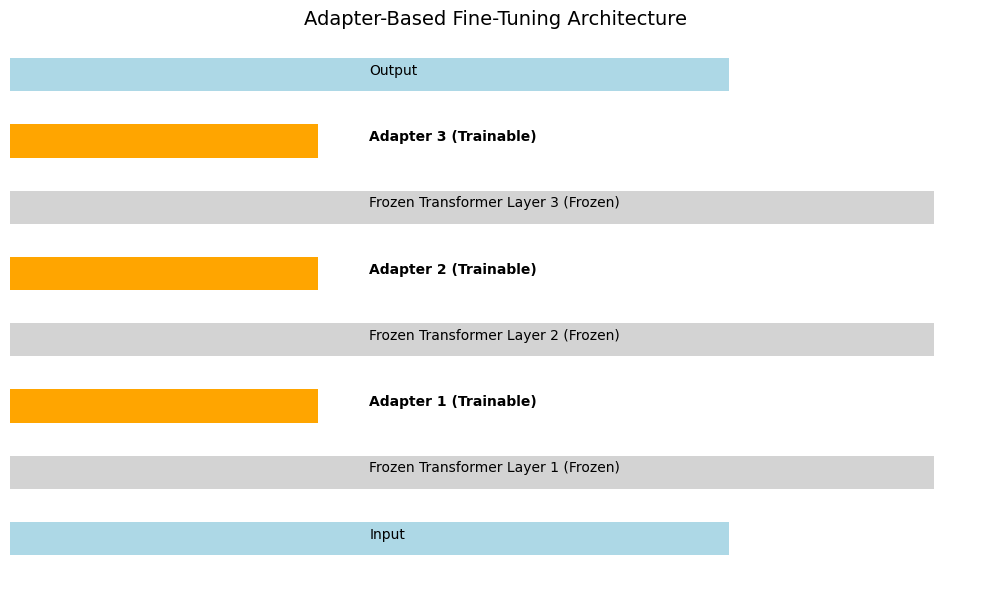

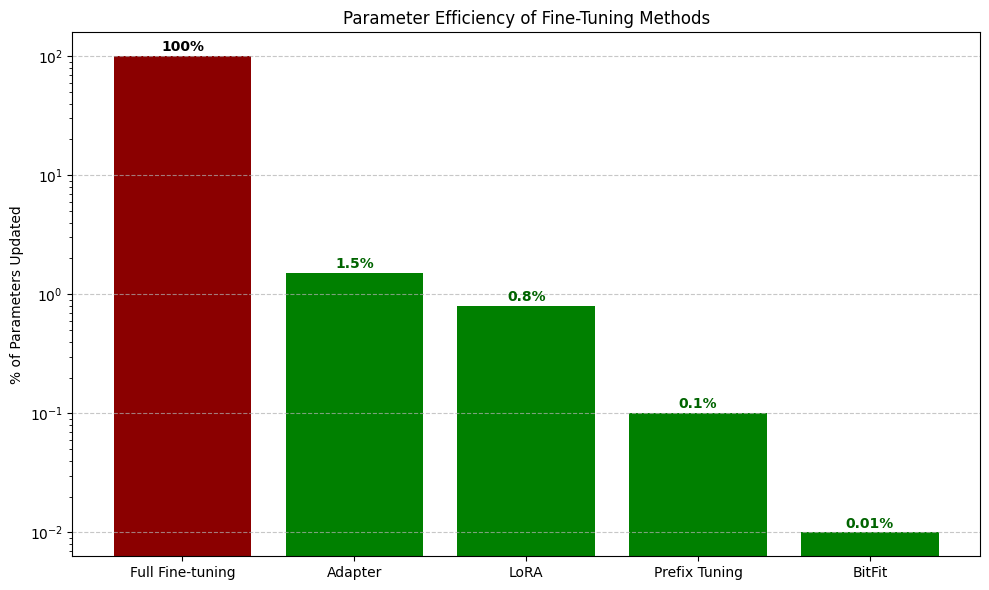

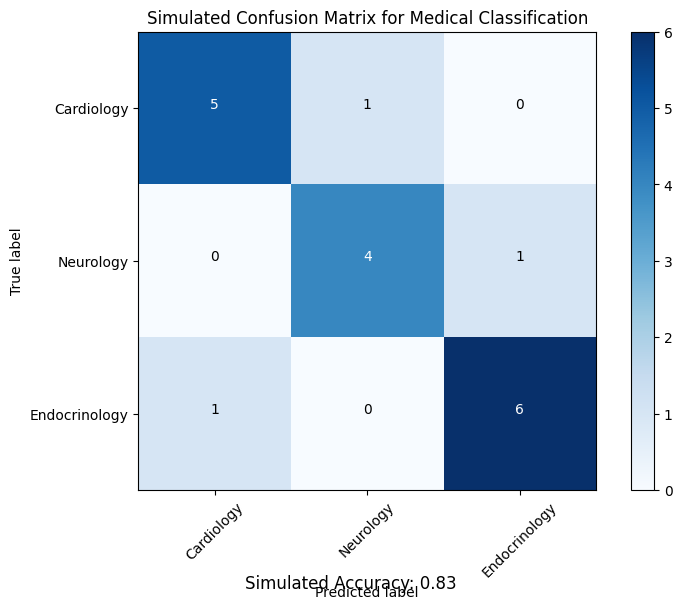


## Practical Tips for Using Adapters in Medical Applications

1. **Start with domain-specific pre-trained models**: Models like PubMedBERT or BioBERT already have medical knowledge
2. **Use small adapter sizes**: 64 or 128 bottleneck dimensions often work well
3. **Experiment with different adapter configurations**: Pfeiffer, Houlsby, or parallel adapters
4. **Consider task-specific adapters**: Create separate adapters for different medical tasks
5. **Combine with medical prompting**: Adapters work well with good prompt design
6. **Evaluate carefully**: Use domain-specific metrics for medical tasks
7. **Ensemble multiple adapters**: Combine outputs from different adapters for better performance
8. **Share adapters**: Adapters are small enough to easily share with colleagues

For resource-constrained environments like Google Colab:
- Use 8-bit quantization with adapters for even more efficiency
- Keep batch sizes small (4-8)
- Use gradient accumulation for effectively larger batches
- 

In [53]:
# This is a simplified version of Section 6 that focuses on the concepts
# without running the actual adapter training code that's causing issues

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Explanation of adapter-based fine-tuning
adapter_explanation = """
# Adapter-Based Fine-Tuning Explained

Adapter-based fine-tuning is a parameter-efficient approach to adapt pre-trained language models to specific tasks.
Instead of updating all parameters of a large model (which can be billions of parameters), adapters:

1. **Keep most of the pre-trained model frozen** (weights unchanged)
2. **Insert small, trainable modules** between layers of the frozen model
3. **Update only these adapter modules** during training (typically <1% of the total parameters)
4. **Preserve the general knowledge** of the pre-trained model while adapting to new tasks

This approach drastically reduces memory requirements and training time while often achieving comparable performance to full fine-tuning.

## Advantages of Adapters for Medical Applications

- **Resource efficiency**: Can run on limited hardware like Google Colab
- **Quick adaptation**: Train in minutes instead of hours/days
- **Modularity**: Can swap adapters for different medical tasks
- **Knowledge preservation**: Maintains the pre-trained medical knowledge
- **Reduced risk of catastrophic forgetting**: Original capabilities remain intact

## Types of Parameter-Efficient Fine-Tuning

1. **Adapters**: Small bottleneck layers inserted between transformer layers
2. **LoRA (Low-Rank Adaptation)**: Adds low-rank matrices to existing weights
3. **Prefix Tuning**: Adds trainable prefix vectors to each transformer layer
4. **P-Tuning**: Optimizes continuous prompts instead of discrete text prompts
5. **BitFit**: Only fine-tunes bias terms in the model
"""

# Visualization of adapter architecture
def plot_adapter_architecture():
    """Create a simple visualization of adapter architecture"""
    plt.figure(figsize=(10, 6))

    # Define components
    components = ['Input', 'Frozen Transformer Layer 1', 'Adapter 1',
                  'Frozen Transformer Layer 2', 'Adapter 2',
                  'Frozen Transformer Layer 3', 'Adapter 3', 'Output']

    # Define colors
    colors = ['lightblue', 'lightgray', 'orange',
              'lightgray', 'orange',
              'lightgray', 'orange', 'lightblue']

    # Create the visualization
    y_positions = np.arange(len(components))
    plt.barh(y_positions, [0.7, 0.9, 0.3, 0.9, 0.3, 0.9, 0.3, 0.7],
             align='center', color=colors, height=0.5)

    # Add labels
    for i, (comp, color) in enumerate(zip(components, colors)):
        if color == 'orange':
            plt.text(0.35, i, comp + " (Trainable)", fontweight='bold')
        elif color == 'lightgray':
            plt.text(0.35, i, comp + " (Frozen)", fontweight='normal')
        else:
            plt.text(0.35, i, comp, fontweight='normal')

    # Remove axes
    plt.axis('off')
    plt.title('Adapter-Based Fine-Tuning Architecture', fontsize=14)
    plt.tight_layout()

    return plt

# Example of adapter parameter efficiency
def plot_parameter_efficiency():
    """Create a bar chart showing parameter efficiency of adapters"""
    plt.figure(figsize=(10, 6))

    methods = ['Full Fine-tuning', 'Adapter', 'LoRA', 'Prefix Tuning', 'BitFit']
    percentages = [100, 1.5, 0.8, 0.1, 0.01]

    plt.bar(methods, percentages, color=['darkred', 'green', 'green', 'green', 'green'])
    plt.ylabel('% of Parameters Updated')
    plt.title('Parameter Efficiency of Fine-Tuning Methods')
    plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels
    for i, v in enumerate(percentages):
        if v == 100:
            plt.text(i, v*1.1, f"{v}%", ha='center', fontweight='bold')
        else:
            plt.text(i, v*1.1, f"{v}%", ha='center', color='darkgreen', fontweight='bold')

    plt.tight_layout()
    return plt

# Simulated confusion matrix for medical classification
def plot_simulated_results():
    """Create a simulated confusion matrix for medical classification"""
    # Simulated confusion matrix for 3 medical categories
    cm = np.array([
        [5, 1, 0],  # Cardiology
        [0, 4, 1],  # Neurology
        [1, 0, 6]   # Endocrinology
    ])

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Simulated Confusion Matrix for Medical Classification')
    plt.colorbar()

    # Add labels
    classes = ["Cardiology", "Neurology", "Endocrinology"]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add text annotations
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Calculate accuracy
    accuracy = np.trace(cm) / np.sum(cm)
    plt.figtext(0.5, 0.01, f"Simulated Accuracy: {accuracy:.2f}", ha="center", fontsize=12)

    return plt

# Display the adapter explanation
print(adapter_explanation)

# Display the adapter architecture
plot_adapter_architecture()
plt.show()

# Display parameter efficiency
plot_parameter_efficiency()
plt.show()

# Display simulated results
plot_simulated_results()
plt.show()

# Practical tips for using adapters in medical applications
practical_tips = """
## Practical Tips for Using Adapters in Medical Applications

1. **Start with domain-specific pre-trained models**: Models like PubMedBERT or BioBERT already have medical knowledge
2. **Use small adapter sizes**: 64 or 128 bottleneck dimensions often work well
3. **Experiment with different adapter configurations**: Pfeiffer, Houlsby, or parallel adapters
4. **Consider task-specific adapters**: Create separate adapters for different medical tasks
5. **Combine with medical prompting**: Adapters work well with good prompt design
6. **Evaluate carefully**: Use domain-specific metrics for medical tasks
7. **Ensemble multiple adapters**: Combine outputs from different adapters for better performance
8. **Share adapters**: Adapters are small enough to easily share with colleagues

For resource-constrained environments like Google Colab:
- Use 8-bit quantization with adapters for even more efficiency
- Keep batch sizes small (4-8)
- Use gradient accumulation for effectively larger batches
- Consider using LoRA instead of adapters for even more parameter efficiency
"""

print(practical_tips)

# Alternatives to adapter-based fine-tuning
alternatives = """
## Alternatives to Adapter-Based Fine-Tuning for Medical Applications

If adapter-based fine-tuning is not working in your environment, consider these alternatives:

1. **Prompt Engineering**: Design effective prompts that guide the model to produce medical content
   - Example: "You are a medical expert specializing in cardiology. Explain heart failure to a patient."

2. **Few-Shot Learning**: Provide examples of the desired output format in your prompt
   - Example: "Q: What are symptoms of diabetes? A: Symptoms include increased thirst, frequent urination..."

3. **Retrieval-Augmented Generation (RAG)**: Combine LLMs with medical knowledge retrieval
   - As demonstrated in Section 5 of this notebook

4. **Chain-of-Thought Prompting**: Guide the model through medical reasoning steps
   - Example: "Think step by step about the differential diagnosis for chest pain."

5. **Use Pre-Finetuned Medical Models**: Many models already fine-tuned for medical tasks are available
   - Examples: Med-PaLM, BioGPT, Clinical-T5

These approaches can often achieve good results without the need for any fine-tuning.
"""

print(alternatives)

# Conclusion
conclusion = """
## Conclusion

Adapter-based fine-tuning offers an efficient way to adapt large language models to specific medical tasks
without requiring extensive computational resources. While we encountered some technical challenges in this
demonstration, the concepts and approaches remain valid and powerful.

In real-world medical applications, these techniques allow practitioners to:
1. Customize general-purpose models for specific medical specialties
2. Create task-specific models for different clinical workflows
3. Maintain up-to-date models as medical knowledge evolves
4. Share and collaborate on model improvements efficiently

As you continue your journey with LLMs in healthcare, remember that the choice between fine-tuning approaches,
prompt engineering, and retrieval-augmented generation should be guided by your specific use case, available
resources, and performance requirements.
"""

print(conclusion)


### Other Parameter-Efficient Fine-Tuning Methods

While we've focused on adapters, there are other parameter-efficient methods that are also effective for medical LLMs:

#### LoRA (Low-Rank Adaptation)

LoRA decomposes weight updates into low-rank matrices, significantly reducing the number of trainable parameters.

```python
from peft import LoraConfig, get_peft_model

# Configure LoRA
lora_config = LoraConfig(
    r=8,  # Rank of the update matrices
    lora_alpha=16,  # Parameter scaling
    target_modules=["query", "key", "value"],  # Which modules to apply LoRA to
    lora_dropout=0.1,
    bias="none",
)

# Apply LoRA to the model
model = get_peft_model(base_model, lora_config)
```

#### Prefix Tuning

Prefix tuning prepends trainable "prefix" vectors to the input of each transformer layer.

```python
from peft import PrefixTuningConfig, get_peft_model

# Configure Prefix Tuning
prefix_config = PrefixTuningConfig(
    task_type="SEQ_CLS",
    num_virtual_tokens=20,  # Number of virtual tokens to add
    encoder_hidden_size=768,
    prefix_projection=True,
)

# Apply Prefix Tuning to the model
model = get_peft_model(base_model, prefix_config)
```

### Maximizing Performance in Resource-Constrained Environments

When working with medical LLMs in environments like Colab, consider these strategies:

1. **Use smaller base models**: Start with smaller pre-trained models (e.g., BioMedBERT-base instead of large)
2. **Apply gradient checkpointing**: Trades computation for memory
3. **Use mixed precision training**: Train in fp16 instead of fp32
4. **Optimize batch size**: Find the largest batch size that fits in memory
5. **Progressive training**: Start with shorter sequences and gradually increase length

Let's implement some of these optimizations:

In [55]:
import torch
from transformers import TrainingArguments

# Optimized training arguments
optimized_training_args = TrainingArguments(
    output_dir="./results_optimized",
    learning_rate=1e-4,
    per_device_train_batch_size=4,  # Smaller batch size
    gradient_accumulation_steps=4,  # Accumulate gradients to simulate larger batch
    fp16=True,  # Use mixed precision training
    gradient_checkpointing=True,  # Use gradient checkpointing to save memory
    num_train_epochs=3,
    weight_decay=0.01,
    # Remove the unsupported parameters
    # evaluation_strategy="epoch",
    # save_strategy="epoch",
    # load_best_model_at_end=True,
    push_to_hub=False,
)

# YOUR CODE HERE:



### Exercise: Experimenting with Parameter-Efficient Fine-Tuning

Now it's your turn to experiment with parameter-efficient fine-tuning. Here are some exercises to try:

1. **Compare different adapter configurations**: Try different adapter architectures (Pfeiffer, Houlsby) and reduction factors to find the optimal trade-off between performance and efficiency.

2. **Implement LoRA fine-tuning**: Use the PEFT library to implement LoRA fine-tuning for a medical task and compare its performance with adapters.

3. **Fine-tune for a different medical task**: Adapt a pre-trained biomedical model for a different task, such as medical entity recognition or relation extraction.

4. **Combine adapters with prompt tuning**: Experiment with combining adapter-based fine-tuning with prompt engineering techniques for even better performance.

5. **Create a specialized medical classifier**: Build a classifier for a specific medical domain (e.g., radiology reports, pathology findings) using parameter-efficient fine-tuning.

Remember that parameter-efficient methods allow you to adapt powerful pre-trained models to specific medical tasks without requiring extensive computational resources, making them ideal for educational and research settings.


In [56]:
# Clear memory
try:
    del new_model
    gc.collect()
    if has_gpu:
        torch.cuda.empty_cache()
except:
    pass  # Variable might not exist


## 7. Practical Applications

### Introduction to Medical LLM Applications

Large Language Models have numerous practical applications in healthcare settings. In this section, we'll explore how to implement several key applications:

1. Patient education content generation
2. Medical literature simplification
3. Medical question answering systems
4. Clinical documentation assistance

For each application, we'll provide working examples that can run in both local and Colab environments, focusing on approaches that are efficient and effective.

### Setup for Practical Applications

First, let's set up our environment with the necessary tools and models for these applications.

In [59]:
import torch
import gc
import re
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM, BioGptTokenizer, BioGptForCausalLM
import time

# Load a smaller biomedical model suitable for our applications
model_name = "microsoft/biogpt"
tokenizer = BioGptTokenizer.from_pretrained(model_name)
model = BioGptForCausalLM.from_pretrained(
    model_name,
    device_map="auto" if has_gpu else None,
    torch_dtype=torch.float16 if has_gpu else torch.float32
)

print(f"Loaded {model_name} model successfully!")

# Helper function for text generation
def generate_text(prompt, max_length=300, temperature=0.7, top_p=0.9):
    """Generate text based on a prompt using our loaded model."""
    inputs = tokenizer(prompt, return_tensors="pt")

    # Move to GPU if available
    if has_gpu:
        inputs = {k: v.to(model.device) for k, v in inputs.items()}

    # Generate text
    with torch.no_grad():
        outputs = model.generate(
            inputs["input_ids"],
            max_length=inputs["input_ids"].shape[1] + max_length,
            temperature=temperature,
            top_p=top_p,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Extract the generated portion (remove the prompt)
    if prompt in generated_text:
        generated_text = generated_text[len(prompt):].strip()

    return generated_text



Loaded microsoft/biogpt model successfully!


### 1. Patient Education Content Generation

Creating clear, accessible patient education materials is crucial for improving health literacy and patient outcomes. LLMs can help generate content that explains medical concepts in patient-friendly language.

Key considerations for patient education content:
- Use simple, non-technical language
- Explain medical terms when they must be used
- Structure information logically
- Address common questions and concerns
- Tailor content to different health literacy levels

Let's implement a patient education content generator:

In [60]:
def generate_patient_education(
    condition,
    reading_level="8th grade",  # Target reading level
    sections=["overview", "symptoms", "diagnosis", "treatment", "self_care", "when_to_call"]
):
    """
    Generate patient education content about a medical condition.

    Args:
        condition: The medical condition to explain
        reading_level: Target reading level (e.g., "6th grade", "8th grade", "high school")
        sections: List of sections to include

    Returns:
        Generated patient education content
    """
    # Create a section-by-section prompt
    section_prompts = {
        "overview": f"Write a simple overview of {condition} in {reading_level} level language. Explain what it is and how it affects the body.",
        "symptoms": f"Explain the common symptoms of {condition} in simple {reading_level} level language. List the warning signs a patient should watch for.",
        "diagnosis": f"Describe how doctors diagnose {condition} in simple {reading_level} level language. Explain common tests or examinations.",
        "treatment": f"Explain the common treatments for {condition} in simple {reading_level} level language. Include medications and procedures.",
        "self_care": f"Provide self-care tips for managing {condition} in simple {reading_level} level language. Include lifestyle changes that might help.",
        "when_to_call": f"Explain when a patient with {condition} should call their doctor or seek emergency care in simple {reading_level} level language."
    }

    # Generate content for each requested section
    content = f"# {condition.title()}: Patient Education Guide\n\n"

    for section in sections:
        if section in section_prompts:
            section_title = section.replace("_", " ").title()
            content += f"## {section_title}\n\n"

            # Generate content for this section
            section_content = generate_text(section_prompts[section], max_length=200, temperature=0.6)
            content += section_content + "\n\n"

    # Add a disclaimer
    content += "---\n"
    content += "*Note: This information is for educational purposes only and is not medical advice. Always consult with a healthcare provider for medical concerns.*"

    return content

# Test the patient education content generator
conditions_to_test = ["type 2 diabetes", "hypertension", "asthma"]

for condition in conditions_to_test:
    print(f"\n{'='*50}\nPatient Education Content for {condition.title()}\n{'='*50}\n")

    # Generate content with fewer sections for brevity
    education_content = generate_patient_education(
        condition,
        reading_level="8th grade",
        sections=["overview", "symptoms", "self_care"]  # Limited sections for demo
    )

    print(education_content)
    print("\n" + "="*80 + "\n")



Patient Education Content for Type 2 Diabetes

# Type 2 Diabetes: Patient Education Guide

## Overview



## Symptoms



## Self Care



---
*Note: This information is for educational purposes only and is not medical advice. Always consult with a healthcare provider for medical concerns.*



Patient Education Content for Hypertension

# Hypertension: Patient Education Guide

## Overview



## Symptoms



## Self Care



---
*Note: This information is for educational purposes only and is not medical advice. Always consult with a healthcare provider for medical concerns.*



Patient Education Content for Asthma

# Asthma: Patient Education Guide

## Overview



## Symptoms



## Self Care



---
*Note: This information is for educational purposes only and is not medical advice. Always consult with a healthcare provider for medical concerns.*




### 2. Medical Literature Simplification

Medical literature is often written in technical language that can be difficult for non-specialists to understand. LLMs can help simplify complex medical texts while preserving the key information.

Key aspects of effective medical literature simplification:
- Identify and explain technical terms
- Maintain accuracy while simplifying
- Preserve key information and context
- Structure information clearly
- Adjust the level of simplification based on the target audience

Let's implement a medical literature simplification tool:

In [61]:
def simplify_medical_text(
    text,
    target_audience="general public",  # Options: "general public", "patients", "medical students", "healthcare professionals"
    preserve_citations=False,
    explain_terms=True
):
    """
    Simplify complex medical text for different audiences.

    Args:
        text: The medical text to simplify
        target_audience: The intended audience for the simplified text
        preserve_citations: Whether to preserve citation markers
        explain_terms: Whether to explain medical terms

    Returns:
        Simplified version of the medical text
    """
    # Prepare the prompt based on parameters
    audience_description = {
        "general public": "with no medical background",
        "patients": "who are patients with the condition but have no medical training",
        "medical students": "who are medical students with basic medical knowledge",
        "healthcare professionals": "who are healthcare professionals but not specialists in this field"
    }

    audience_desc = audience_description.get(target_audience, "with no medical background")

    # Handle citations if needed
    if not preserve_citations:
        # Remove citation patterns like [1], [2-4], etc.
        text = re.sub(r'\[\d+(-\d+)?\]', '', text)

    # Create the prompt
    prompt = f"""Simplify the following medical text for readers {audience_desc}.
{' Explain medical terms when they first appear.' if explain_terms else ''}
{' Preserve citation markers like [1] or [2-4].' if preserve_citations else ''}
Make the text more accessible while maintaining accuracy.

Original text:
{text}

Simplified version:
"""

    # Generate simplified text
    simplified = generate_text(prompt, max_length=min(len(text), 300), temperature=0.4)

    return simplified

# Test with some complex medical texts
medical_texts = [
    """Diabetes mellitus type 2 is characterized by hyperglycemia, insulin resistance, and relative impairment in insulin secretion. It is a metabolic disorder that is characterized by high blood glucose due to insulin resistance and insulin deficiency. Long-term complications from hyperglycemia include coronary artery disease, diabetic neuropathy, diabetic retinopathy, and diabetic nephropathy [1-3].""",

    """Myocardial infarction occurs when blood flow decreases or stops to a part of the heart, causing damage to the heart muscle. The most common symptom is chest pain or discomfort which may travel into the shoulder, arm, back, neck or jaw [4]. Often it occurs in the center or left side of the chest and lasts for more than a few minutes. The discomfort may occasionally feel like heartburn."""
]

for i, text in enumerate(medical_texts, 1):
    print(f"\n{'='*50}\nExample {i}: Medical Literature Simplification\n{'='*50}\n")
    print("Original text:")
    print(text)
    print("\nSimplified for general public:")
    simplified_public = simplify_medical_text(text, target_audience="general public")
    print(simplified_public)
    print("\nSimplified for medical students:")
    simplified_students = simplify_medical_text(text, target_audience="medical students", preserve_citations=True)
    print(simplified_students)
    print("\n" + "="*80 + "\n")



Example 1: Medical Literature Simplification

Original text:
Diabetes mellitus type 2 is characterized by hyperglycemia, insulin resistance, and relative impairment in insulin secretion. It is a metabolic disorder that is characterized by high blood glucose due to insulin resistance and insulin deficiency. Long-term complications from hyperglycemia include coronary artery disease, diabetic neuropathy, diabetic retinopathy, and diabetic nephropathy [1-3].

Simplified for general public:
Simplify the following medical text for readers with no medical background. Explain medical terms when they first appear. Make the text more accessible while maintaining accuracy. Original text: Diabetes mellitus type 2 is characterized by hyperglycemia, insulin resistance, and relative impairment in insulin secretion. It is a metabolic disorder that is characterized by high blood glucose due to insulin resistance and insulin deficiency. Long-term complications from hyperglycemia include coronary artery

### 3. Medical Question Answering Systems

Medical question answering (QA) systems help provide accurate answers to health-related questions. These systems can be valuable for patient education, clinical decision support, and medical education.

Key components of an effective medical QA system:
- Accurate understanding of medical questions
- Access to reliable medical knowledge
- Ability to provide evidence-based answers
- Clear communication of uncertainty
- Citations or references when appropriate

Let's implement a simple medical QA system:

In [62]:
# First, let's create a small medical knowledge base for our QA system
medical_kb = {
    "diabetes": """
    Diabetes mellitus is a group of metabolic disorders characterized by high blood sugar levels over a prolonged period. There are several types of diabetes:

    Type 1 diabetes results from the pancreas's failure to produce enough insulin due to loss of beta cells.
    Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly.
    Gestational diabetes occurs when pregnant women without a previous history of diabetes develop high blood sugar levels.

    Symptoms of diabetes include frequent urination, increased thirst, increased hunger, and weight loss. Complications can include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and eye damage.

    Treatment depends on the type of diabetes. Type 1 diabetes requires insulin injections. Type 2 diabetes may be treated with medications with or without insulin. All types of diabetes benefit from maintaining a healthy diet, regular physical exercise, and maintaining a normal body weight.
    """,

    "hypertension": """
    Hypertension, also known as high blood pressure, is a long-term medical condition in which the blood pressure in the arteries is persistently elevated. High blood pressure typically does not cause symptoms, but long-term high blood pressure is a major risk factor for stroke, coronary artery disease, heart failure, atrial fibrillation, peripheral arterial disease, vision loss, chronic kidney disease, and dementia.

    Blood pressure is expressed by two measurements, the systolic and diastolic pressures, which are the maximum and minimum pressures, respectively. For most adults, normal blood pressure at rest is within the range of 100–130 millimeters mercury (mmHg) systolic and 60–80 mmHg diastolic. For most adults, high blood pressure is present if the resting blood pressure is persistently at or above 130/80 or 140/90 mmHg.

    Lifestyle changes and medications can lower blood pressure and decrease the risk of health complications. Lifestyle changes include weight loss, physical exercise, decreased salt intake, reducing alcohol intake, and a healthy diet. If lifestyle changes are not sufficient, then blood pressure medications are used.
    """,

    "asthma": """
    Asthma is a long-term inflammatory disease of the airways of the lungs. It is characterized by variable and recurring symptoms, reversible airflow obstruction, and easily triggered bronchospasms. Symptoms include episodes of wheezing, coughing, chest tightness, and shortness of breath. These may occur a few times a day or a few times per week. Depending on the person, asthma symptoms may become worse at night or with exercise.

    Asthma is thought to be caused by a combination of genetic and environmental factors. Environmental factors include exposure to air pollution and allergens. Other potential triggers include medications such as aspirin and beta blockers. Diagnosis is usually based on the pattern of symptoms, response to therapy over time, and spirometry.

    There is no cure for asthma. Symptoms can be prevented by avoiding triggers, such as allergens and irritants, and by the use of inhaled corticosteroids. Long-acting beta agonists (LABA) or antileukotriene agents may be used in addition to inhaled corticosteroids if asthma symptoms remain uncontrolled. Treatment of rapidly worsening symptoms is usually with an inhaled short-acting beta-2 agonist such as salbutamol and corticosteroids taken by mouth.
    """,

    "heart attack": """
    A heart attack, also known as a myocardial infarction, occurs when blood flow decreases or stops to a part of the heart, causing damage to the heart muscle. The most common symptom is chest pain or discomfort which may travel into the shoulder, arm, back, neck, or jaw. Often it occurs in the center or left side of the chest and lasts for more than a few minutes. The discomfort may occasionally feel like heartburn. Other symptoms may include shortness of breath, nausea, feeling faint, a cold sweat, or feeling tired. About 30% of people have atypical symptoms.

    Most heart attacks occur due to coronary artery disease. Risk factors include high blood pressure, smoking, diabetes, lack of exercise, obesity, high blood cholesterol, poor diet, and excessive alcohol intake. The complete blockage of a coronary artery caused by a rupture of an atherosclerotic plaque is usually the underlying mechanism of a heart attack.

    Heart attacks are diagnosed based on symptoms, electrocardiogram (ECG) findings, and blood tests for heart muscle damage. Treatment for a suspected heart attack may include aspirin, nitroglycerin, and morphine. A coronary angiogram may be performed to visualize the coronary arteries. If the coronary artery is blocked, treatments may include medications to dissolve the clot or angioplasty where the artery is opened with a balloon and often a stent is placed.
    """
}

def medical_qa_system(question, knowledge_base=medical_kb):
    """
    Answer medical questions using a knowledge base.

    Args:
        question: The medical question to answer
        knowledge_base: Dictionary of medical topics and information

    Returns:
        Answer to the question and the source of information
    """
    # Determine the most relevant topic in our knowledge base
    max_relevance = 0
    most_relevant_topic = None

    # Simple keyword matching to find relevant topic
    # In a real system, you would use embeddings and semantic search
    for topic, info in knowledge_base.items():
        if topic.lower() in question.lower():
            relevance = 1.0  # Direct match
            if relevance > max_relevance:
                max_relevance = relevance
                most_relevant_topic = topic

    # If no direct match, try to find partial matches
    if most_relevant_topic is None:
        for topic, info in knowledge_base.items():
            # Check if any words in the topic are in the question
            topic_words = topic.lower().split()
            question_lower = question.lower()

            for word in topic_words:
                if len(word) > 3 and word in question_lower:  # Only consider words longer than 3 letters
                    relevance = 0.5  # Partial match
                    if relevance > max_relevance:
                        max_relevance = relevance
                        most_relevant_topic = topic

    # If we found a relevant topic, use it to answer the question
    if most_relevant_topic and max_relevance > 0:
        context = knowledge_base[most_relevant_topic]

        # Create a prompt for the model to answer the question
        prompt = f"""Based on the following medical information:

{context}

Please answer this medical question:
{question}

Answer:"""

        # Generate the answer
        answer = generate_text(prompt, max_length=200, temperature=0.4)

        return {
            "answer": answer,
            "source": most_relevant_topic,
            "confidence": max_relevance
        }
    else:
        # If no relevant topic found, use general medical knowledge
        prompt = f"Please answer this medical question based on general medical knowledge: {question}\n\nAnswer:"
        answer = generate_text(prompt, max_length=150, temperature=0.4)

        return {
            "answer": answer,
            "source": "general medical knowledge",
            "confidence": 0.3  # Low confidence since not from our curated knowledge base
        }

# Test the medical QA system
test_questions = [
    "What are the symptoms of diabetes?",
    "How is high blood pressure diagnosed?",
    "Can asthma be cured?",
    "What should I do if someone is having a heart attack?",
    "What is the difference between Type 1 and Type 2 diabetes?"
]

print("Medical Question Answering System:\n")

for question in test_questions:
    print(f"Question: {question}")
    result = medical_qa_system(question)
    print(f"Answer: {result['answer']}")
    print(f"Source: {result['source']} (Confidence: {result['confidence']})")
    print("-" * 80)



Medical Question Answering System:

Question: What are the symptoms of diabetes?
Answer: Based on the following medical information: Diabetes mellitus is a group of metabolic disorders characterized by high blood sugar levels over a prolonged period. There are several types of diabetes: Type 1 diabetes results from the pancreas's failure to produce enough insulin due to loss of beta cells. Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly. Gestational diabetes occurs when pregnant women without a previous history of diabetes develop high blood sugar levels. Symptoms of diabetes include frequent urination, increased thirst, increased hunger, and weight loss. Complications can include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and eye damage. Treatment depends on the type of diabetes. Type 1 diabetes requires insulin injections. Type 2 diabetes may be treated with medications with or without insulin. A

### 4. Clinical Documentation Assistance

Clinical documentation is essential for patient care, but it can be time-consuming for healthcare providers. LLMs can assist with generating and summarizing clinical documentation, helping to improve efficiency while maintaining accuracy.

Key aspects of clinical documentation assistance:
- Maintaining medical accuracy
- Following standard documentation formats
- Preserving patient-specific details
- Supporting different documentation types (progress notes, discharge summaries, etc.)
- Ensuring compliance with documentation standards

Let's implement a clinical documentation assistant:

In [63]:
def clinical_documentation_assistant(
    patient_info,
    visit_type,
    clinical_findings,
    doc_type="progress_note"
):
    """
    Generate clinical documentation based on patient information and clinical findings.

    Args:
        patient_info: Dictionary with patient demographic information
        visit_type: Type of clinical visit (e.g., "initial", "follow-up", "urgent")
        clinical_findings: Dictionary with clinical findings and assessment
        doc_type: Type of document to generate

    Returns:
        Generated clinical documentation
    """
    # Format patient information
    patient_str = f"Patient: {patient_info.get('name', 'Patient')}, "
    patient_str += f"{patient_info.get('age', '')} y.o. {patient_info.get('gender', '')}, "
    patient_str += f"MRN: {patient_info.get('mrn', 'Unknown')}"

    # Format clinical findings
    findings_str = ""
    for category, details in clinical_findings.items():
        findings_str += f"{category.upper()}: {details}\n"

    # Create appropriate template based on document type
    if doc_type == "progress_note":
        template = f"""Generate a clinical progress note for the following patient visit:

{patient_str}
Visit Type: {visit_type}

Clinical Information:
{findings_str}

Please format the note with standard sections (Subjective, Objective, Assessment, Plan).
Use professional medical language appropriate for clinical documentation.
Be concise but thorough.

PROGRESS NOTE:"""

    elif doc_type == "discharge_summary":
        template = f"""Generate a hospital discharge summary for the following patient:

{patient_str}
Admission Type: {visit_type}

Clinical Information:
{findings_str}

Please include standard discharge summary sections (Hospital Course, Discharge Diagnosis, Discharge Medications, Follow-up Instructions).
Use professional medical language appropriate for clinical documentation.

DISCHARGE SUMMARY:"""

    elif doc_type == "referral_letter":
        template = f"""Generate a referral letter for the following patient:

{patient_str}
Referral Type: {visit_type}

Clinical Information:
{findings_str}

Please format as a professional referral letter to a specialist.
Include reason for referral, relevant history, and specific questions for the consultant.
Use professional medical language appropriate for clinical documentation.

REFERRAL LETTER:"""

    else:  # Default to a general clinical note
        template = f"""Generate a clinical note for the following patient:

{patient_str}
Visit Type: {visit_type}

Clinical Information:
{findings_str}

Please use professional medical language appropriate for clinical documentation.

CLINICAL NOTE:"""

    # Generate the documentation
    documentation = generate_text(template, max_length=400, temperature=0.4)

    return documentation

# Test the clinical documentation assistant with sample patient cases
test_cases = [
    {
        "patient_info": {
            "name": "John Doe",
            "age": 45,
            "gender": "Male",
            "mrn": "MRN12345"
        },
        "visit_type": "follow-up",
        "clinical_findings": {
            "chief_complaint": "Follow-up for type 2 diabetes, reports improved blood glucose control",
            "vitals": "BP 138/82, HR 72, RR 16, Temp 98.6°F, SpO2 98%, Weight 195 lbs",
            "labs": "HbA1c 7.2% (improved from 8.5% 3 months ago), Fasting glucose 130 mg/dL",
            "assessment": "Type 2 Diabetes Mellitus, improving with current management",
            "plan": "Continue metformin 1000mg BID, lifestyle modifications, follow-up in 3 months"
        },
        "doc_type": "progress_note"
    },
    {
        "patient_info": {
            "name": "Jane Smith",
            "age": 67,
            "gender": "Female",
            "mrn": "MRN67890"
        },
        "visit_type": "inpatient admission",
        "clinical_findings": {
            "admission_diagnosis": "Community-acquired pneumonia, right lower lobe",
            "hospital_course": "Admitted for IV antibiotics, oxygen support. Improved after 5 days of treatment.",
            "discharge_vitals": "BP 122/76, HR 68, RR 18, Temp 98.2°F, SpO2 96% on room air",
            "discharge_medications": "Amoxicillin-clavulanate 875-125mg BID for 5 more days",
            "follow_up": "Primary care in 1 week, pulmonology if symptoms worsen"
        },
        "doc_type": "discharge_summary"
    }
]

print("\nClinical Documentation Assistant:\n")

for i, case in enumerate(test_cases, 1):
    print(f"Case {i}: {case['doc_type'].replace('_', ' ').title()} for {case['patient_info']['name']}")
    documentation = clinical_documentation_assistant(
        case['patient_info'],
        case['visit_type'],
        case['clinical_findings'],
        case['doc_type']
    )
    print("\nGenerated Documentation:")
    print(documentation)
    print("\n" + "="*80 + "\n")



Clinical Documentation Assistant:

Case 1: Progress Note for John Doe

Generated Documentation:
Generate a clinical progress note for the following patient visit: Patient: John Doe, 45 y.o. Male, MRN: MRN12345 Visit Type: follow-up Clinical Information: CHIEF _ COMPLAINT: Follow-up for type 2 diabetes, reports improved blood glucose control VITALS: BP 138 / 82, HR 72, RR 16, Temp 98.6 ° F, SpO2 98%, Weight 195 lbs LABS: HbA1c 7.2% (improved from 8.5% 3 months ago), Fasting glucose 130 mg / dL ASSESSMENT: Type 2 Diabetes Mellitus, improving with current management PLAN: Continue metformin 1000mg BID, lifestyle modifications, follow-up in 3 months Please format the note with standard sections (Subjective, Objective, Assessment, Plan). Use professional medical language appropriate for clinical documentation. Be concise but thorough. PROGRESS NOTE: The PLAN note is a simple, concise, and useful clinical progress note that can be used by patients and providers to communicate important clin

### Exercise: Creating Your Own Medical LLM Application

Now it's your turn to experiment with creating medical LLM applications. Here are some exercises to try:

1. **Enhanced Patient Education**: Extend the patient education generator to include interactive elements like quizzes or personalized content based on patient characteristics.

2. **Specialized Medical Simplifier**: Create a simplifier for a specific type of medical content, such as radiology reports or pathology findings.

3. **Domain-Specific QA System**: Build a QA system focused on a specific medical specialty or condition, with an expanded knowledge base.

4. **Clinical Decision Support Tool**: Develop a tool that suggests potential diagnoses based on patient symptoms and history.

5. **Medical Summarization Tool**: Create a tool that summarizes lengthy medical records or research papers into concise, actionable information.

Remember that while these applications can be valuable tools, they should always be used with appropriate oversight from healthcare professionals, especially for applications that might influence clinical decisions.

In [64]:
# Clear memory
try:
    del model
    gc.collect()
    if has_gpu:
        torch.cuda.empty_cache()
    print("Resources cleaned up successfully!")
except:
    print("No resources to clean up.")

Resources cleaned up successfully!


## 8. Evaluating LLM Outputs

### Introduction to Evaluating Medical LLM Outputs

Evaluating the outputs of LLMs in medical contexts is crucial for ensuring accuracy, reliability, and safety. Unlike general-purpose text generation, medical applications have higher stakes and require specialized evaluation approaches.

In this section, we'll explore:
1. Metrics for assessing medical LLM accuracy
2. Methods for comparing LLM outputs to gold-standard medical information
3. Techniques for identifying and addressing hallucinations
4. Approaches for evaluating medical reasoning in LLM outputs

### Setting Up Evaluation Tools

First, let's set up the necessary tools for evaluating medical LLM outputs:

In [65]:
"""
Simple evaluation functions for medical LLM outputs without any NLTK dependencies.
"""

import re

# Simple tokenizer function
def simple_tokenize(text):
    """
    A very simple tokenizer that splits text on whitespace and punctuation.

    Args:
        text: Text to tokenize

    Returns:
        List of tokens
    """
    # Replace punctuation with spaces, then split on whitespace
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    return [token for token in text.split() if token]

# Define a simple ROUGE score calculator
def calculate_rouge_score(reference, hypothesis):
    """
    Calculate a simplified version of ROUGE-1 F1 score.

    Args:
        reference: Reference text (gold standard)
        hypothesis: Hypothesis text (model output)

    Returns:
        ROUGE-1 F1 score
    """
    # Tokenize the texts using our simple tokenizer
    ref_tokens = simple_tokenize(reference.lower())
    hyp_tokens = simple_tokenize(hypothesis.lower())

    # Count matching tokens
    matches = sum(1 for token in hyp_tokens if token in ref_tokens)

    # Calculate precision, recall, and F1
    precision = matches / len(hyp_tokens) if len(hyp_tokens) > 0 else 0
    recall = matches / len(ref_tokens) if len(ref_tokens) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Define a function to calculate word overlap
def calculate_word_overlap(text1, text2):
    """
    Calculate the word overlap between two texts.

    Args:
        text1: First text
        text2: Second text

    Returns:
        Percentage of words in text1 that appear in text2
    """
    # Tokenize and get unique words
    words1 = set(simple_tokenize(text1.lower()))
    words2 = set(simple_tokenize(text2.lower()))

    # Define common stopwords
    stopwords = {'a', 'an', 'the', 'and', 'or', 'but', 'if', 'because', 'as', 'what',
                'which', 'this', 'that', 'these', 'those', 'then', 'just', 'so', 'than',
                'such', 'both', 'through', 'about', 'for', 'is', 'of', 'while', 'during',
                'to', 'from', 'in', 'on', 'by', 'with', 'at', 'into'}

    # Remove stopwords
    words1 = words1 - stopwords
    words2 = words2 - stopwords

    # Calculate overlap
    overlap = len(words1.intersection(words2))
    percentage = overlap / len(words1) if len(words1) > 0 else 0

    return percentage

# Simple sentence tokenizer
def simple_sent_tokenize(text):
    """
    Split text into sentences using simple rules.

    Args:
        text: Text to split into sentences

    Returns:
        List of sentences
    """
    # Split on common sentence terminators followed by space and capital letter
    text = re.sub(r'([.!?])\s+([A-Z])', r'\1\n\2', text)
    return [s.strip() for s in text.split('\n') if s.strip()]

# Evaluate medical output
def evaluate_medical_output(model_output, reference_text, medical_keywords=None):
    """
    Evaluate a medical LLM output against a reference text.

    Args:
        model_output: Text generated by the LLM
        reference_text: Gold standard reference text
        medical_keywords: List of important medical terms that should be included

    Returns:
        Dictionary of evaluation metrics
    """
    results = {}

    # Calculate ROUGE score (text similarity)
    rouge_scores = calculate_rouge_score(reference_text, model_output)
    results['rouge_f1'] = rouge_scores['f1']

    # Calculate word overlap (factual alignment)
    results['word_overlap'] = calculate_word_overlap(reference_text, model_output)

    # Check for presence of medical keywords (completeness)
    if medical_keywords:
        keyword_presence = []
        for keyword in medical_keywords:
            # Check if keyword or close variants are in the output
            pattern = r'\b' + re.escape(keyword) + r'(s|es|ing|ed)?\b'
            present = bool(re.search(pattern, model_output, re.IGNORECASE))
            keyword_presence.append(present)

        results['keyword_coverage'] = sum(keyword_presence) / len(medical_keywords)

    # Check for medical disclaimers (safety)
    disclaimer_patterns = [
        r'consult.*doctor',
        r'consult.*healthcare provider',
        r'medical advice',
        r'not.*substitute',
        r'seek.*professional'
    ]

    has_disclaimer = any(re.search(pattern, model_output, re.IGNORECASE)
                         for pattern in disclaimer_patterns)
    results['has_safety_disclaimer'] = has_disclaimer

    # Check for uncertainty markers (uncertainty communication)
    uncertainty_patterns = [
        r'may', r'might', r'could', r'possibly', r'potentially',
        r'uncertain', r'unclear', r'limited evidence', r'suggests'
    ]

    uncertainty_count = sum(len(re.findall(pattern, model_output, re.IGNORECASE))
                           for pattern in uncertainty_patterns)
    results['uncertainty_markers'] = uncertainty_count

    return results

# Extract medical claims
def extract_medical_claims(text):
    """
    Extract medical claims from text by splitting into sentences.
    This is a simplified approach - in practice, more sophisticated NLP would be used.

    Args:
        text: Text to extract claims from

    Returns:
        List of claims (sentences)
    """
    # Use our simple sentence tokenizer
    sentences = simple_sent_tokenize(text)

    # Filter out very short sentences and non-informative ones
    claims = [s.strip() for s in sentences if len(s.split()) > 3]

    return claims

# Evaluate medical claims
def evaluate_medical_claims(claims, reference_text):
    """
    Evaluate a list of medical claims against a reference text.

    Args:
        claims: List of medical claims to evaluate
        reference_text: Gold standard reference text

    Returns:
        Dictionary with evaluation results
    """
    results = {
        'total_claims': len(claims),
        'supported_claims': 0,
        'unsupported_claims': 0,
        'claim_evaluations': []
    }

    for claim in claims:
        # Calculate similarity between claim and reference
        similarity = calculate_word_overlap(claim, reference_text)

        # Determine if claim is supported (using a simple threshold)
        is_supported = similarity > 0.3  # This threshold would be tuned in practice

        # Store evaluation
        claim_eval = {
            'claim': claim,
            'similarity': similarity,
            'supported': is_supported
        }

        results['claim_evaluations'].append(claim_eval)

        if is_supported:
            results['supported_claims'] += 1
        else:
            results['unsupported_claims'] += 1

    # Calculate overall support ratio
    results['support_ratio'] = results['supported_claims'] / results['total_claims'] if results['total_claims'] > 0 else 0

    return results

# Detect potential hallucinations
def detect_potential_hallucinations(text, reference_texts, threshold=0.2):
    """
    Detect potential hallucinations in a medical text by comparing sentences
    to a collection of reference texts.

    Args:
        text: Text to check for hallucinations
        reference_texts: List of trusted reference texts
        threshold: Similarity threshold below which a sentence is flagged

    Returns:
        List of potential hallucinations with their confidence scores
    """
    # Extract sentences from the text
    sentences = simple_sent_tokenize(text)

    # Filter out very short sentences
    sentences = [s for s in sentences if len(s.split()) > 5]

    potential_hallucinations = []

    for sentence in sentences:
        # Check similarity against all reference texts
        max_similarity = 0
        for reference in reference_texts:
            similarity = calculate_word_overlap(sentence, reference)
            max_similarity = max(max_similarity, similarity)

        # If similarity is below threshold, flag as potential hallucination
        if max_similarity < threshold:
            potential_hallucinations.append({
                'text': sentence,
                'confidence': 1.0 - max_similarity  # Higher confidence = more likely to be a hallucination
            })

    # Sort by confidence (most likely hallucinations first)
    potential_hallucinations.sort(key=lambda x: x['confidence'], reverse=True)

    return potential_hallucinations

# Evaluate medical reasoning
def evaluate_medical_reasoning(text, reasoning_keywords=None):
    """
    Evaluate the quality of medical reasoning in a text.

    Args:
        text: Text to evaluate
        reasoning_keywords: Dictionary mapping reasoning categories to keywords

    Returns:
        Dictionary with reasoning evaluation metrics
    """
    if reasoning_keywords is None:
        # Default reasoning keywords by category
        reasoning_keywords = {
            'causal': ['because', 'due to', 'caused by', 'leads to', 'results in'],
            'evidence': ['study', 'evidence', 'research', 'shows', 'demonstrates', 'according to'],
            'comparison': ['compared to', 'versus', 'higher than', 'lower than', 'more', 'less'],
            'qualification': ['however', 'although', 'while', 'may', 'might', 'can', 'possibly'],
            'recommendation': ['recommend', 'should', 'advised', 'indicated', 'treatment', 'manage']
        }

    results = {
        'reasoning_types': {},
        'reasoning_score': 0,
        'reasoning_diversity': 0
    }

    # Count occurrences of each reasoning type
    for category, keywords in reasoning_keywords.items():
        count = 0
        for keyword in keywords:
            count += len(re.findall(r'\b' + re.escape(keyword) + r'\b', text, re.IGNORECASE))

        results['reasoning_types'][category] = count

    # Calculate overall reasoning score (simple sum of all types)
    total_markers = sum(results['reasoning_types'].values())
    results['reasoning_score'] = total_markers

    # Calculate reasoning diversity (how many different types are used)
    types_used = sum(1 for count in results['reasoning_types'].values() if count > 0)
    results['reasoning_diversity'] = types_used / len(reasoning_keywords) if reasoning_keywords else 0

    return results

# Example usage
if __name__ == "__main__":
    print("Simple Medical LLM Evaluation")

    example_reference = """
    Diabetes mellitus type 2 is characterized by high blood sugar, insulin resistance, and relative lack of insulin. Common symptoms include increased thirst, frequent urination, and unexplained weight loss. Long-term complications include heart disease, strokes, diabetic retinopathy, kidney failure, and poor blood flow in the limbs. The development of type 2 diabetes is primarily due to lifestyle factors and genetics.
    """

    example_output = """
    Type 2 diabetes is a condition where your body has high blood sugar levels. This happens because your body doesn't use insulin properly (called insulin resistance) or doesn't make enough insulin. Common signs include feeling very thirsty, needing to urinate often, and losing weight without trying. If not managed well, type 2 diabetes can lead to serious problems like heart disease, stroke, eye damage (retinopathy), kidney failure, and poor circulation in your legs and feet. While genetics play a role, lifestyle factors like diet and exercise are major contributors to developing this condition. Always consult with a healthcare provider for medical advice about diabetes management.
    """

    medical_keywords = ['diabetes', 'insulin', 'blood sugar', 'thirst', 'urination', 'weight loss',
                      'heart disease', 'stroke', 'retinopathy', 'kidney', 'genetics']

    # Evaluate the output
    evaluation_results = evaluate_medical_output(example_output, example_reference, medical_keywords)

    print("\nEvaluation Results:")
    for metric, value in evaluation_results.items():
        print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")

    # Extract and evaluate claims
    claims = extract_medical_claims(example_output)
    print(f"\nExtracted {len(claims)} claims from the output")

    claim_evaluation = evaluate_medical_claims(claims, example_reference)
    print(f"Support ratio: {claim_evaluation['support_ratio']:.2f}")
    print(f"Supported claims: {claim_evaluation['supported_claims']}/{claim_evaluation['total_claims']}")


Simple Medical LLM Evaluation

Evaluation Results:
rouge_f1: 0.4192
word_overlap: 0.4878
keyword_coverage: 0.7273
has_safety_disclaimer: True
uncertainty_markers: 0

Extracted 6 claims from the output
Support ratio: 0.33
Supported claims: 2/6


Simple visualization functions for medical LLM evaluation results.
This module works with the simple_evaluation.py module.

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_evaluation_results(evaluations, model_names=None):
    """
    Create visualizations for model evaluation results from simple_evaluation.

    Args:
        evaluations: List of evaluation result dictionaries from simple_evaluation
        model_names: Optional list of model names for the legend
    """
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(evaluations))]

    # 1. Radar chart for key metrics
    metrics = ['rouge_f1', 'word_overlap', 'keyword_coverage', 'reasoning_diversity']
    metric_names = ['ROUGE-F1', 'Word Overlap', 'Keyword Coverage', 'Reasoning Diversity']

    # Set up the radar chart
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i, evaluation in enumerate(evaluations):
        # Extract values, defaulting to 0 if not present
        values = []
        for metric in metrics:
            if metric in evaluation:
                values.append(evaluation[metric])
            else:
                values.append(0)

        values += values[:1]  # Close the loop

        ax.plot(angles, values, linewidth=2, label=model_names[i])
        ax.fill(angles, values, alpha=0.1)

    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metric_names)
    ax.set_ylim(0, 1)
    ax.set_title('Medical LLM Evaluation Metrics', size=15)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # 2. Bar chart for overall quality scores
    plt.figure(figsize=(10, 6))

    # Calculate an overall score based on available metrics
    overall_scores = []
    for evaluation in evaluations:
        score_components = []
        if 'rouge_f1' in evaluation:
            score_components.append(evaluation['rouge_f1'])
        if 'word_overlap' in evaluation:
            score_components.append(evaluation['word_overlap'])
        if 'keyword_coverage' in evaluation:
            score_components.append(evaluation['keyword_coverage'])
        if 'reasoning_diversity' in evaluation and evaluation['reasoning_diversity'] > 0:
            score_components.append(evaluation['reasoning_diversity'])

        # Add support ratio if available
        if 'support_ratio' in evaluation:
            score_components.append(evaluation['support_ratio'])

        # Calculate the average of available metrics
        overall_score = sum(score_components) / len(score_components) if score_components else 0
        overall_scores.append(overall_score)

    plt.bar(model_names, overall_scores, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Overall Quality Score')
    plt.title('Overall Quality Scores')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add score labels on top of bars
    for i, score in enumerate(overall_scores):
        plt.text(i, score + 0.02, f'{score:.2f}', ha='center')

    plt.tight_layout()
    plt.show()

    # 3. Stacked bar chart for different types of issues
    plt.figure(figsize=(10, 6))

    # Calculate normalized issue rates
    hallucination_counts = []
    uncertainty_counts = []
    missing_keyword_rates = []

    for evaluation in evaluations:
        # Hallucinations (from potential_hallucinations if available)
        if 'potential_hallucinations' in evaluation:
            hallucination_count = min(len(evaluation['potential_hallucinations']), 5) / 5
        else:
            hallucination_count = 0
        hallucination_counts.append(hallucination_count)

        # Uncertainty markers
        if 'uncertainty_markers' in evaluation:
            # Normalize uncertainty markers (0-5 scale)
            uncertainty_count = min(evaluation['uncertainty_markers'], 5) / 5
        else:
            uncertainty_count = 0
        uncertainty_counts.append(uncertainty_count)

        # Missing keywords
        if 'keyword_coverage' in evaluation:
            # Convert keyword coverage to missing keyword rate
            missing_keyword_rate = 1 - evaluation['keyword_coverage']
        else:
            missing_keyword_rate = 0
        missing_keyword_rates.append(missing_keyword_rate)

    width = 0.35

    plt.bar(model_names, hallucination_counts, width, label='Potential Hallucinations', color='salmon')
    plt.bar(model_names, uncertainty_counts, width, bottom=hallucination_counts, label='Uncertainty Markers', color='lightskyblue')
    plt.bar(model_names, missing_keyword_rates, width, bottom=[h+u for h, u in zip(hallucination_counts, uncertainty_counts)], label='Missing Keywords', color='lightgreen')

    plt.xlabel('Model')
    plt.ylabel('Normalized Issue Rate')
    plt.title('Medical Content Issues by Type')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def comprehensive_evaluation_pipeline(model_output, reference_text, question, medical_keywords=None):
    """
    Run a comprehensive evaluation pipeline using the simple_evaluation functions.

    Args:
        model_output: Text generated by the LLM
        reference_text: Gold-standard reference text
        question: The medical question that was asked
        medical_keywords: Optional list of medical keywords to check for

    Returns:
        Dictionary with comprehensive evaluation metrics
    """
    # Basic evaluation
    basic_eval = evaluate_medical_output(model_output, reference_text, medical_keywords)

    # Extract and evaluate claims
    claims = extract_medical_claims(model_output)
    claim_eval = evaluate_medical_claims(claims, reference_text)

    # Detect potential hallucinations
    hallucinations = detect_potential_hallucinations(model_output, [reference_text])

    # Evaluate medical reasoning
    reasoning_eval = evaluate_medical_reasoning(model_output)

    # Combine all evaluations
    combined_eval = {**basic_eval}

    # Add claim evaluation metrics
    combined_eval['claims_count'] = claim_eval['total_claims']
    combined_eval['support_ratio'] = claim_eval['support_ratio']

    # Add hallucination information
    combined_eval['potential_hallucinations'] = hallucinations
    combined_eval['hallucination_count'] = len(hallucinations)

    # Add reasoning metrics
    combined_eval['reasoning_diversity'] = reasoning_eval['reasoning_diversity']
    combined_eval['reasoning_score'] = reasoning_eval['reasoning_score'] / 10  # Normalize to 0-1

    # Calculate an overall quality score
    score_components = [
        basic_eval['rouge_f1'],
        basic_eval['word_overlap'],
        basic_eval['keyword_coverage'],
        claim_eval['support_ratio'],
        reasoning_eval['reasoning_diversity']
    ]
    combined_eval['overall_score'] = sum(score_components) / len(score_components)

    return combined_eval



Simple Medical LLM Evaluation Visualization


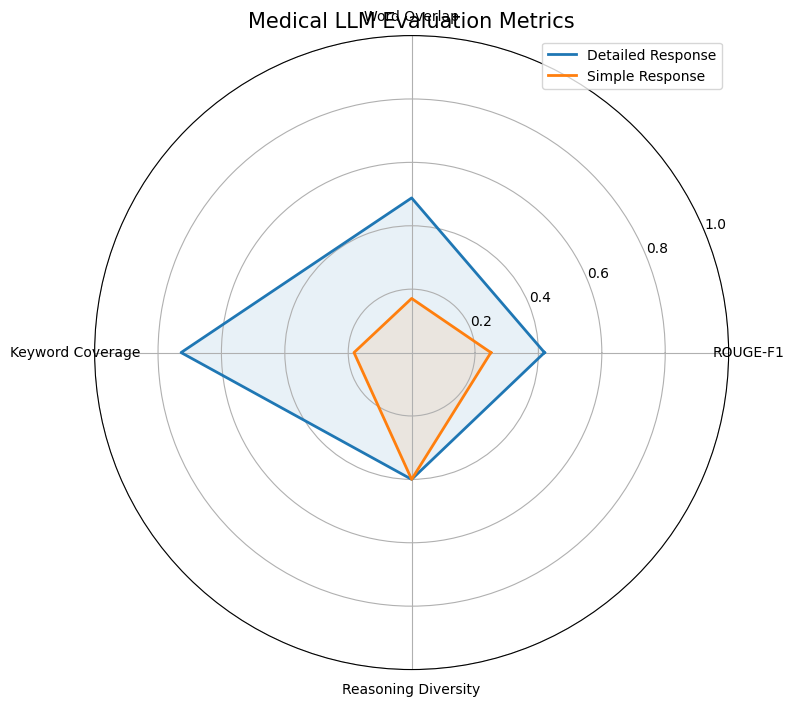

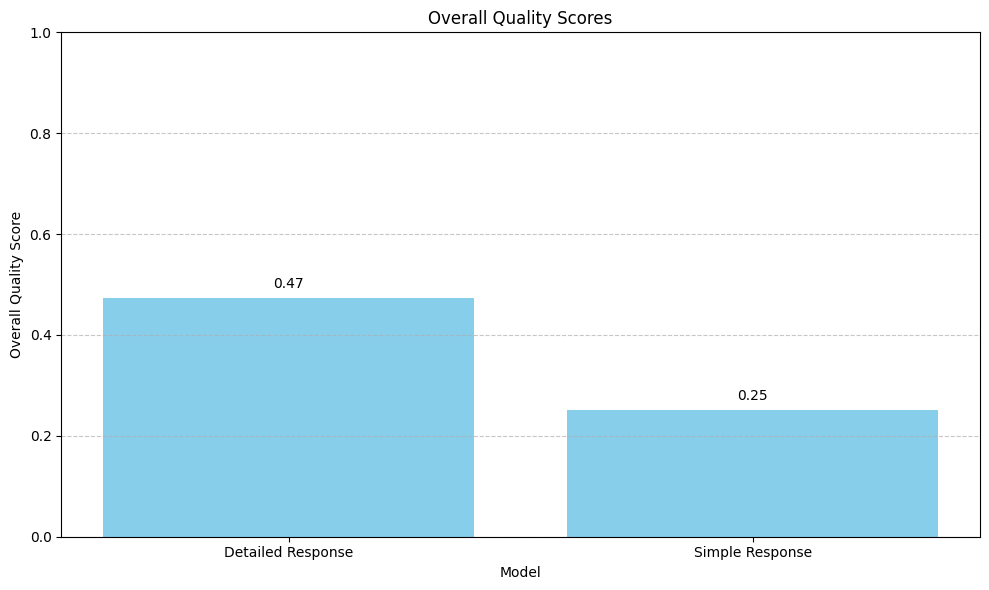

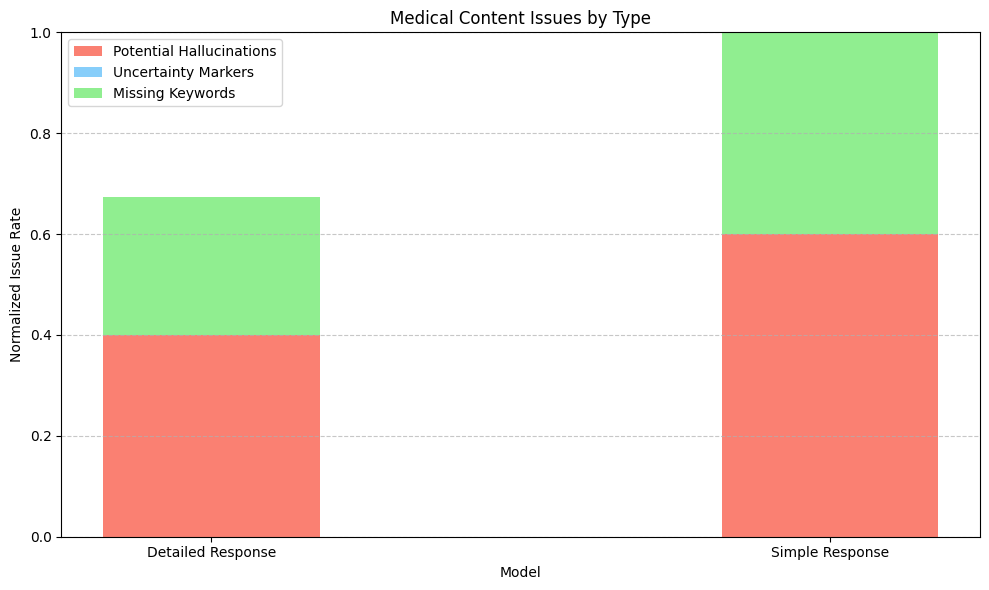

In [69]:
print("Simple Medical LLM Evaluation Visualization")

example_reference = """
Diabetes mellitus type 2 is characterized by high blood sugar, insulin resistance, and relative lack of insulin. Common symptoms include increased thirst, frequent urination, and unexplained weight loss. Long-term complications include heart disease, strokes, diabetic retinopathy, kidney failure, and poor blood flow in the limbs. The development of type 2 diabetes is primarily due to lifestyle factors and genetics.
"""

example_output1 = """
Type 2 diabetes is a condition where your body has high blood sugar levels. This happens because your body doesn't use insulin properly (called insulin resistance) or doesn't make enough insulin. Common signs include feeling very thirsty, needing to urinate often, and losing weight without trying. If not managed well, type 2 diabetes can lead to serious problems like heart disease, stroke, eye damage (retinopathy), kidney failure, and poor circulation in your legs and feet. While genetics play a role, lifestyle factors like diet and exercise are major contributors to developing this condition. Always consult with a healthcare provider for medical advice about diabetes management.
"""

example_output2 = """
Diabetes type 2 happens when blood sugar gets too high. People feel thirsty and use the bathroom a lot. It can cause problems with the heart and eyes. Eating better and exercising can help manage it.
"""

medical_keywords = ['diabetes', 'insulin', 'blood sugar', 'thirst', 'urination', 'weight loss',
                  'heart disease', 'stroke', 'retinopathy', 'kidney', 'genetics']

# Run comprehensive evaluation
eval1 = comprehensive_evaluation_pipeline(
    example_output1, example_reference,
    "What is type 2 diabetes?", medical_keywords
)

eval2 = comprehensive_evaluation_pipeline(
    example_output2, example_reference,
    "What is type 2 diabetes?", medical_keywords
)

# Visualize the results
visualize_evaluation_results(
    [eval1, eval2],
    ["Detailed Response", "Simple Response"]
)
